In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy
from scipy.stats import zscore

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Baseball_Study_case.csv")

In [3]:
df.head(5)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [4]:
df.tail(5)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [5]:
df.shape

(30, 17)

In [6]:
type(df)

pandas.core.frame.DataFrame

In [7]:
df.ndim

2

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [9]:
df.sample()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
23,67,573,5420,1361,251,18,100,471,1107,69,760,698,4.41,3,10,44,90


# About Columns:

01.  W -  Wins   #out column
02.  R -  Runs
03. AB - At Bats
04.  H - Hits
05. 2B - Doubles
06. 3B - Triples
07. HR - Homeruns
08. BB - Walks
09. SO - Strikeouts
10. SB - Stolen Bases
11. RA - Runs Allowed
12. ER - Earned Runs
13. ER - Earned Run Average (ERA)
14. CG - Complete game: number of games where player was the only pitcher for their team
15. SHO -Shutout: number of complete games pitched with no runs allowed
16. SV – Save: number of games where the pitcher enters a game led by the pitcher's team, finishes the game without  surrendering the lead, is not the winning pitcher, and either 
    (a) the lead was three runs or fewer when the pitcher entered the game;
    (b) the potential tying run was on base, at bat, or on deck;
    (c) the pitcher pitched three or more innings 

17.  E – Errors: number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result

# Checking Null Value

In [10]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

<AxesSubplot:>

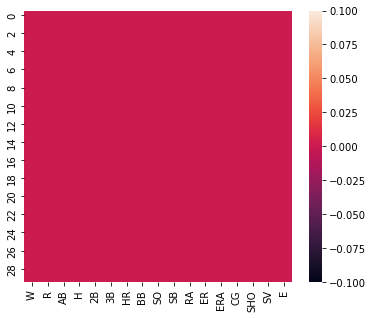

In [11]:
plt.figure(figsize=(6,5))
sns.heatmap(df.isnull())

In [12]:
df['W'].unique()

array([ 95,  83,  81,  76,  74,  93,  87,  80,  78,  88,  86,  85,  68,
       100,  98,  97,  64,  90,  71,  67,  63,  92,  84,  79], dtype=int64)

In [13]:
df['W'].duplicated().sum()

6

In [14]:
df['R'].unique()

array([724, 696, 669, 622, 689, 891, 764, 713, 644, 748, 751, 729, 661,
       656, 694, 647, 697, 655, 640, 683, 703, 613, 573, 626, 667, 720,
       650, 737], dtype=int64)

In [15]:
df['R'].duplicated().sum()

2

In [16]:
df['AB'].unique()

array([5575, 5467, 5439, 5533, 5605, 5509, 5567, 5485, 5640, 5511, 5459,
       5417, 5544, 5600, 5484, 5631, 5491, 5480, 5571, 5527, 5428, 5463,
       5420, 5529, 5385, 5565, 5649, 5457, 5572], dtype=int64)

In [17]:
df['AB'].duplicated().sum()

1

In [18]:
df['H'].unique()

array([1497, 1349, 1395, 1381, 1515, 1480, 1397, 1370, 1383, 1495, 1419,
       1363, 1331, 1379, 1405, 1386, 1462, 1341, 1378, 1382, 1351, 1420,
       1361, 1374, 1346, 1486, 1494, 1324, 1479], dtype=int64)

In [19]:
df['H'].duplicated().sum()

1

In [20]:
df['2B'].unique()

array([300, 277, 303, 260, 289, 308, 272, 246, 278, 294, 279, 243, 262,
       288, 292, 274, 257, 295, 265, 236, 251, 263], dtype=int64)

In [21]:
df['2B'].duplicated().sum()

8

In [22]:
df['3B'].unique()

array([42, 44, 29, 27, 49, 17, 19, 20, 32, 33, 26, 21, 22, 46, 39, 30, 34,
       13, 40, 18, 37, 48, 36], dtype=int64)

In [23]:
df['3B'].duplicated().sum()

7

In [24]:
df['HR'].unique()

array([139, 156, 141, 136, 151, 232, 212, 217, 167, 161, 172, 230, 176,
       198, 146, 137, 140, 171, 145, 177, 120, 100, 130, 187, 154, 148,
       186], dtype=int64)

In [25]:
df['HR'].duplicated().sum()

3

In [26]:
df['BB'].unique()

array([383, 439, 533, 404, 455, 570, 554, 418, 436, 478, 503, 486, 435,
       475, 506, 461, 567, 412, 496, 488, 539, 375, 471, 387, 563, 457,
       490, 426, 388], dtype=int64)

In [27]:
df['BB'].duplicated().sum()

1

In [28]:
df['SO'].unique()

array([ 973, 1264, 1157, 1231, 1259, 1151, 1227, 1331, 1310, 1148, 1233,
       1392, 1150, 1336, 1119, 1267, 1322, 1518, 1299, 1255, 1290, 1344,
       1107, 1274, 1258, 1159, 1312, 1327, 1283], dtype=int64)

In [29]:
df['BB'].duplicated().sum()

1

In [30]:
df['SB'].unique()

array([104,  70,  86,  68,  83,  88,  63,  44,  87,  71, 101, 121,  52,
        69,  78,  98,  95,  84, 134,  51,  57, 112,  59,  93, 132,  82,
        97], dtype=int64)

In [31]:
df['SB'].duplicated().sum()

3

In [32]:
df['RA'].unique()

array([641, 700, 640, 701, 803, 670, 698, 693, 642, 753, 733, 618, 675,
       726, 729, 525, 596, 608, 737, 754, 613, 635, 678, 760, 809, 595,
       627, 713, 731, 844], dtype=int64)

In [33]:
df['RA'].duplicated().sum()

0

In [34]:
df['ER'].unique()

array([601, 653, 584, 643, 746, 609, 652, 646, 604, 694, 680, 572, 630,
       677, 664, 478, 532, 546, 682, 700, 557, 577, 638, 698, 749, 553,
       597, 659, 655, 799], dtype=int64)

In [35]:
df['ER'].duplicated().sum()

0

In [36]:
df['ERA'].unique()

array([3.73, 4.07, 3.67, 3.98, 4.64, 3.8 , 4.03, 4.05, 3.74, 4.31, 4.24,
       3.57, 3.94, 4.16, 4.14, 2.94, 3.21, 3.36, 4.28, 4.33, 3.43, 3.62,
       4.02, 4.41, 4.69, 3.44, 3.72, 4.04, 4.09, 5.04])

In [37]:
df['ERA'].duplicated().sum()

0

In [38]:
df['CG'].unique()

array([ 2, 11,  7,  3,  0,  1,  5,  6,  4], dtype=int64)

In [39]:
df['CG'].duplicated().sum()

21

In [40]:
df['SHO'].unique()

array([ 8, 12, 10,  9,  4, 13, 15, 21,  7, 14, 18,  6], dtype=int64)

In [41]:
df['SHO'].duplicated().sum()

18

In [42]:
df['SV'].unique()

array([56, 45, 38, 37, 35, 34, 48, 43, 60, 40, 39, 46, 28, 62, 54, 50, 41,
       44, 47, 36], dtype=int64)

In [43]:
df['SV'].duplicated().sum()

10

In [44]:
df['E'].unique()

array([ 88,  86,  79, 101,  93,  77,  95,  97, 119,  85,  94, 126,  96,
       122, 111, 116,  90, 117,  75,  78,  92], dtype=int64)

In [45]:
df['E'].duplicated().sum()

9

### Checking Duplicated values in DataFrame

In [46]:
print("Total Duplicated Rows are ",df.duplicated().sum())

Total Duplicated Rows are  0


Proceeding with EDA as all counts are found to be intact

<AxesSubplot:>

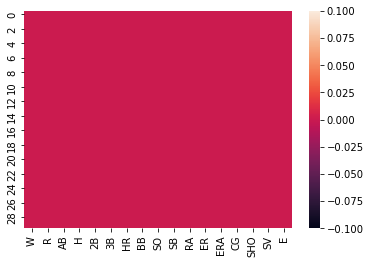

In [47]:
sns.heatmap(df.isnull())

# EDA(Exploratory Data Analysis)

### Univariate Analysis

68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: W, dtype: int64

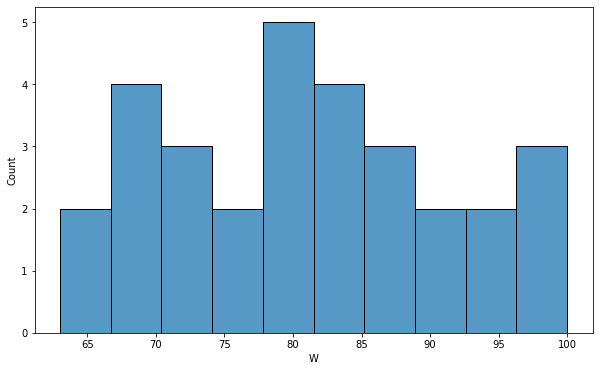

In [48]:
plt.figure(figsize=(10,6))
sns.histplot(data=df,x='W',bins=10)
df['W'].value_counts()

Maximum wins counts lies at 78 to 85

Minimum Wins  63 And maximum Wins 100


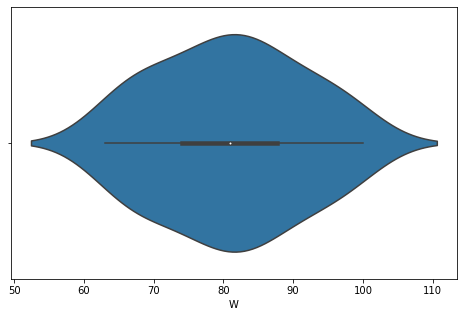

In [49]:
plt.figure(figsize=(8,5))
sns.violinplot(data=df,x='W',bw='scott') #bw : {'scott', 'silverman', float}
print("Minimum Wins ",df['W'].min(),"And maximum Wins",df['W'].max())

Minimum Wins lies at 63 And maximum Wins lies at 100

Minimum Run  573 And maximum Run 891


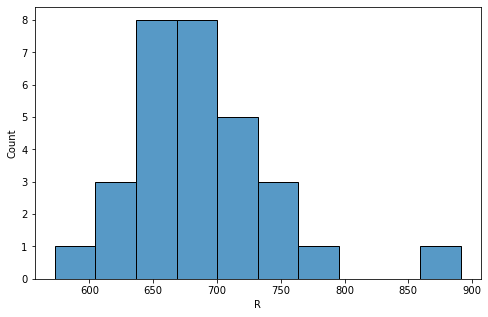

In [50]:
plt.figure(figsize=(8,5))
sns.histplot(data=df,x='R',bins=10)
print("Minimum Run ",df['R'].min(),"And maximum Run",df['R'].max())

Minimum Runs are at 573 And maximum Run are at 891

Minimum Run  573 And maximum Run 891


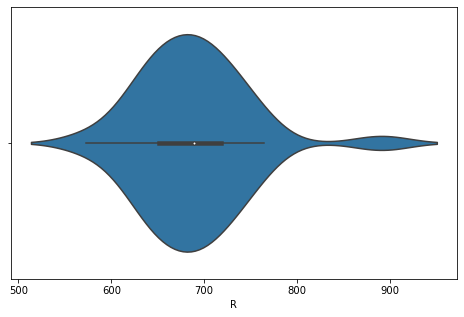

In [51]:
plt.figure(figsize=(8,5))
sns.violinplot(data=df,x='R')
print("Minimum Run ",df['R'].min(),"And maximum Run",df['R'].max())

Minimum Run lies between at 640 And maximum Run at 700

Minimum At Bat  5385 And maximum At Bat 5649


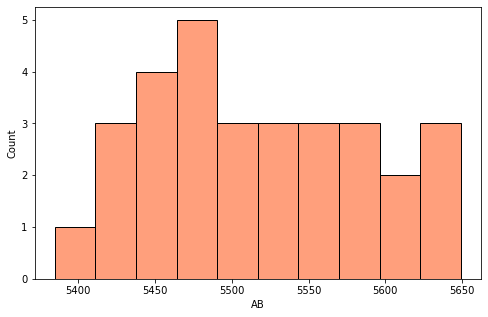

In [52]:
plt.figure(figsize=(8,5))
sns.histplot(data=df,x='AB',bins=10,color='coral')
print("Minimum At Bat ",df['AB'].min(),"And maximum At Bat",df['AB'].max())

Minimum At Bat is 5385 And Maximum At Bat is 5649

<AxesSubplot:xlabel='AB'>

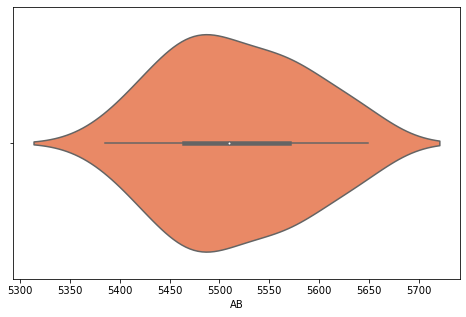

In [53]:
plt.figure(figsize=(8,5))
sns.violinplot(data=df,x='AB',bins=10,color='coral')

At bat maximum count lies at 5460 to 5480

 Minimum Hits  1324 And Maximum Hits  1515


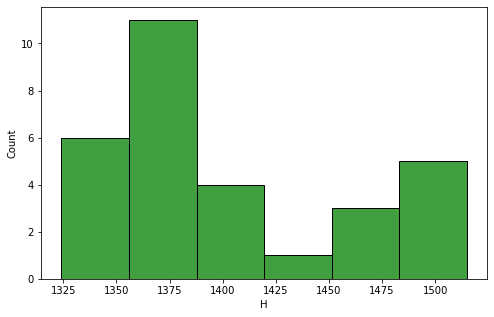

In [54]:
plt.figure(figsize=(8,5))
sns.histplot(data=df,x='H',color='green')
print(" Minimum Hits ",df['H'].min(),'And Maximum Hits ',df['H'].max())

Minimum Hits count is 1324 And Maximum Hits is 1515

<AxesSubplot:xlabel='H'>

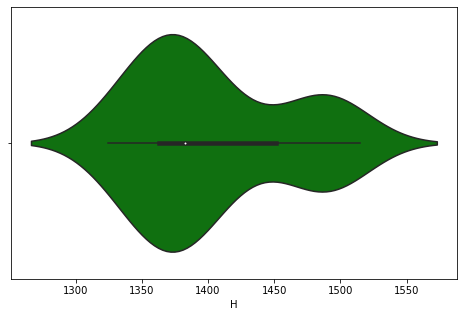

In [55]:
plt.figure(figsize=(8,5))
sns.violinplot(data=df,x='H',color='green')

Maximum counts of hits lies between 1350 and 1400

 Minimum Double  236 And Maximum Double  308


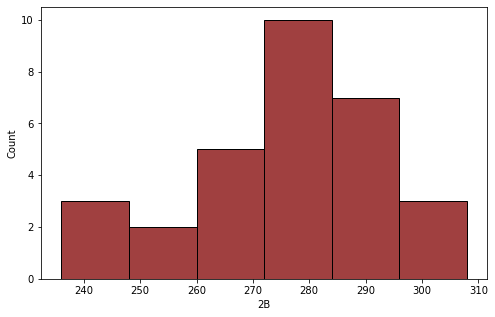

In [56]:
plt.figure(figsize=(8,5))
sns.histplot(data=df,x='2B',color='maroon')
print(" Minimum Double ",df['2B'].min(),'And Maximum Double ',df['2B'].max())

Double lies between Minimum Double  236 And Maximum Double  308

<AxesSubplot:xlabel='2B'>

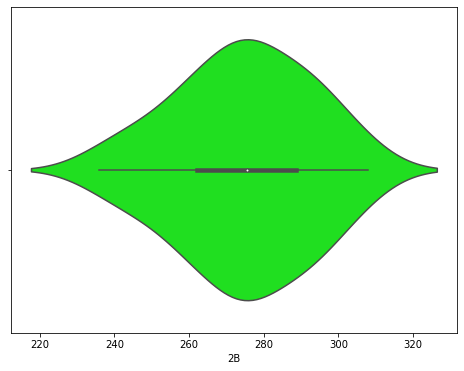

In [57]:
plt.figure(figsize=(8,6))
sns.violinplot(data=df,x='2B',color='lime')

Maximum Doubles lies between 270 to 285

 Minimum Triple  13 And Maximum Triple  49


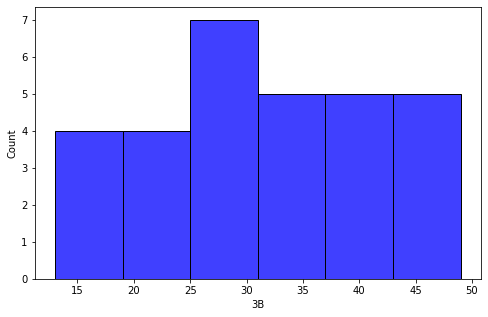

In [58]:
plt.figure(figsize=(8,5))
sns.histplot(data=df,x='3B',color='blue')
print(" Minimum Triple ",df['3B'].min(),'And Maximum Triple ',df['3B'].max())

Triple lies between Minimum 13 And Maximum 49

<AxesSubplot:xlabel='3B'>

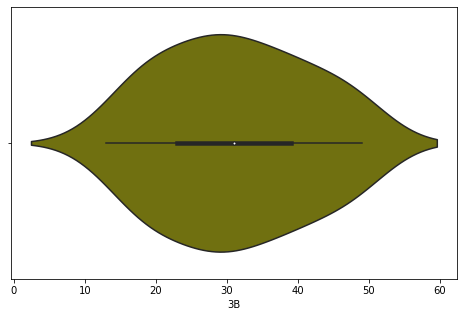

In [59]:
plt.figure(figsize=(8,5))
sns.violinplot(data=df,x='3B',color='olive')

maximum triple lies at 25 to 32

 Minimum Home Run  100 And Maximum Home Runn  232


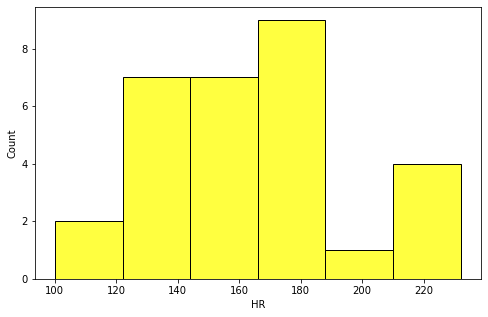

In [60]:
plt.figure(figsize=(8,5))
sns.histplot(data=df,x='HR',color='yellow')
print(" Minimum Home Run ",df['HR'].min(),'And Maximum Home Runn ',df['HR'].max())

Minimum Home Run is 100 and maximum is 232

 Minimum Home Run  100 And Maximum Home Run  232


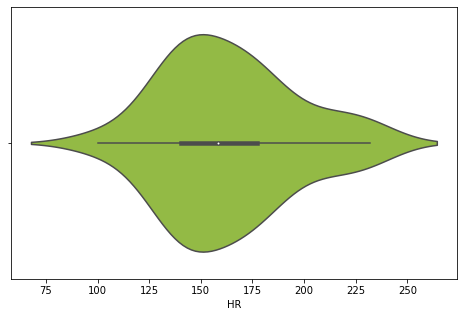

In [61]:
plt.figure(figsize=(8,5))
sns.violinplot(data=df,x='HR',color='yellowgreen')
print(" Minimum Home Run ",df['HR'].min(),'And Maximum Home Run ',df['HR'].max())

Home Runs ies between 125 to 175

 Minimum Base on Ball  375 And Maximum Base on Ball  570


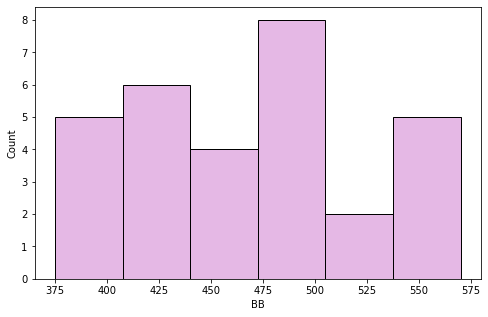

In [62]:
plt.figure(figsize=(8,5))
sns.histplot(data=df,x='BB',color='plum')
print(" Minimum Base on Ball ",df['BB'].min(),'And Maximum Base on Ball ',df['BB'].max())

Minimum Base on Ball is 375 And Maximum Base on Ball is 570

<AxesSubplot:xlabel='BB'>

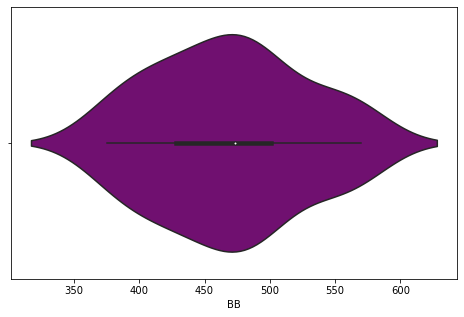

In [63]:
plt.figure(figsize=(8,5))
sns.violinplot(data=df,x='BB',color='purple')

Maximum count lies between 450 to 500

 Minimum Strikeouts  973 And Maximum Strikeouts 1518


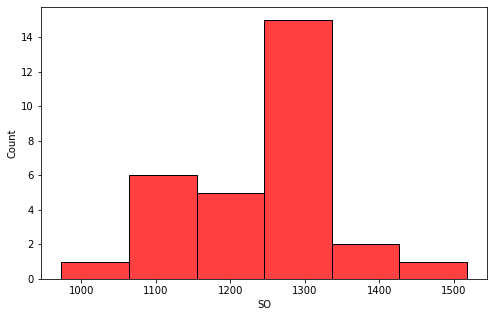

In [64]:
plt.figure(figsize=(8,5))
sns.histplot(data=df,x='SO',color='red')
print(" Minimum Strikeouts ",df['SO'].min(),'And Maximum Strikeouts',df['SO'].max())

 Minimum Strikeouts  973 And Maximum Strikeouts  1518


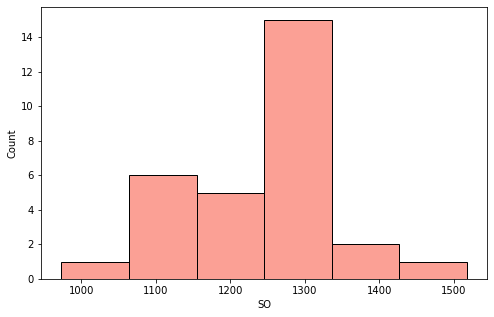

In [65]:
plt.figure(figsize=(8,5))
sns.histplot(data=df,x='SO',color='salmon')
print(" Minimum Strikeouts ",df['SO'].min(),'And Maximum Strikeouts ',df['SO'].max())

 Minimum Strikeouts  973 And Maximum Strikeouts  1518

<AxesSubplot:xlabel='SO'>

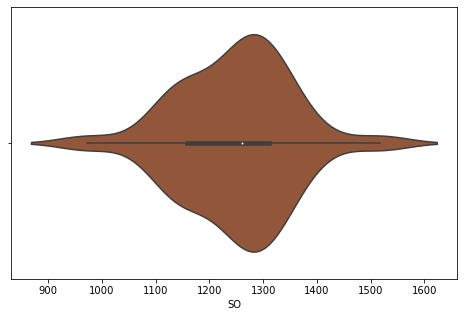

In [66]:
plt.figure(figsize=(8,5))
sns.violinplot(data=df,x='SO',color='sienna')

Maximum count lies at 1300

 Minimum Stolen Base  44 And Maximum Stolen Base  134


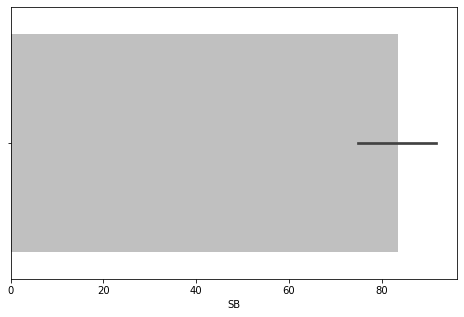

In [67]:
plt.figure(figsize=(8,5))
sns.barplot(data=df,x='SB',color='silver')
print(" Minimum Stolen Base ",df['SB'].min(),'And Maximum Stolen Base ',df['SB'].max())

 Minimum Stolen Base  44 And Maximum Stolen Base  134


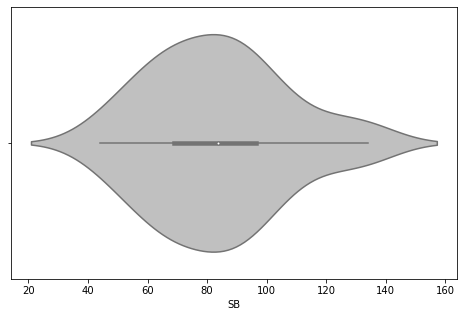

In [68]:
plt.figure(figsize=(8,5))
sns.violinplot(data=df,x='SB',color='silver')
print(" Minimum Stolen Base ",df['SB'].min(),'And Maximum Stolen Base ',df['SB'].max())

Maximum count lies between 65 and 85

 Minimum Run Average  525 And Maximum Run Average 844


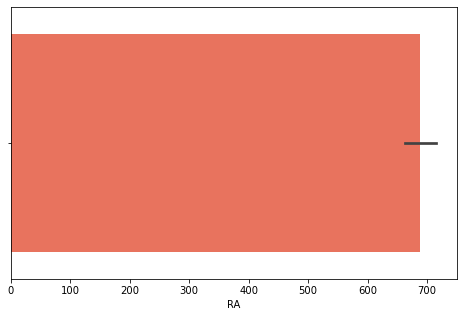

In [69]:
plt.figure(figsize=(8,5))
sns.barplot(data=df,x='RA',color='tomato')
print(" Minimum Run Average ",df['RA'].min(),'And Maximum Run Average',df['RA'].max())

 Minimum Stolen Base  44 And Maximum Stolen Base  134


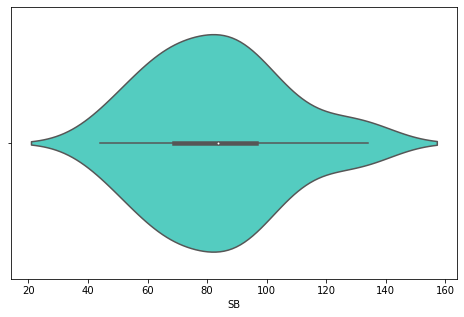

In [70]:
plt.figure(figsize=(8,5))
sns.violinplot(data=df,x='SB',color='turquoise')
print(" Minimum Stolen Base ",df['SB'].min(),'And Maximum Stolen Base ',df['SB'].max())

Maximum frequency lies between 70 to 90

 Minimum Earned Run  478 And Maximum Earned Run  799


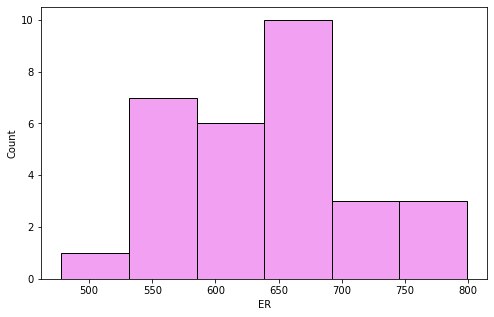

In [71]:
plt.figure(figsize=(8,5))
sns.histplot(data=df,x='ER',color='violet')
print(" Minimum Earned Run ",df['ER'].min(),'And Maximum Earned Run ',df['ER'].max())

1. Minimum Earned Run  478 And Maximum Earned Run  799
2. Maximum Run counts lies between 640 to 690

 Minimum Earned Run  2.94 And Maximum Earned Run  5.04


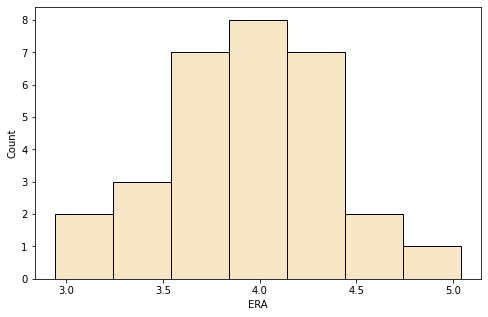

In [72]:
plt.figure(figsize=(8,5))
sns.histplot(data=df,x='ERA',color='wheat')
print(" Minimum Earned Run ",df['ERA'].min(),'And Maximum Earned Run ',df['ERA'].max())

 Minimum Counts Earned Run 2.94 And Maximum Earned Run  5.04

<AxesSubplot:xlabel='ERA'>

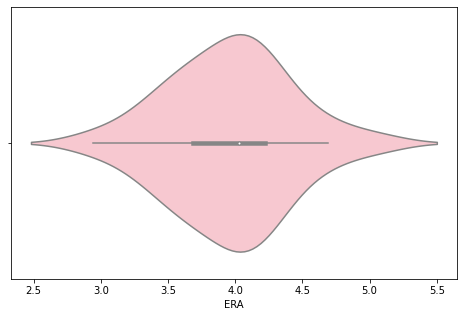

In [73]:
plt.figure(figsize=(8,5))
sns.violinplot(data=df,x='ERA',color='pink')

Maximum Frequency counts of data lies at 4.0

 Minimum Complete game:  0 And Maximum Complete game:  11


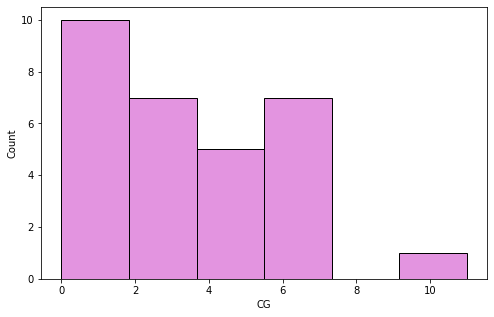

In [74]:
plt.figure(figsize=(8,5))
sns.histplot(data=df,x='CG',color='orchid')
print(" Minimum Complete game: ",df['CG'].min(),'And Maximum Complete game: ',df['CG'].max())

Minimum Complete game:  0 And Maximum Complete game:  11

<AxesSubplot:xlabel='CG'>

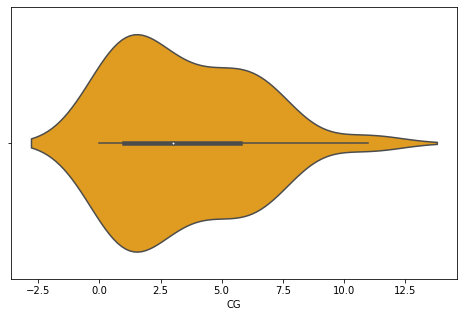

In [75]:
plt.figure(figsize=(8,5))
sns.violinplot(data=df,x='CG',color='orange')

Maximum Volume lies between 0 to 2.5

 Minimum Soutout in game:  4 And Maximum Soutout in game:  21


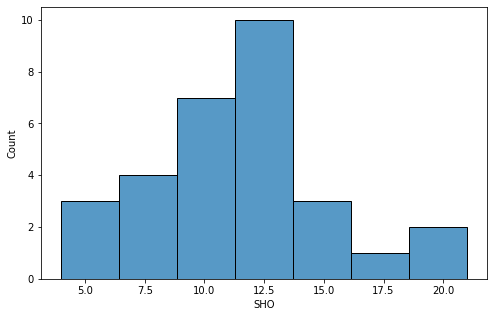

In [76]:
plt.figure(figsize=(8,5))
sns.histplot(data=df,x='SHO')
print(" Minimum Soutout in game: ",df['SHO'].min(),'And Maximum Soutout in game: ',df['SHO'].max())

Minimum Soutout in game is 4 and Maximum Soutout in game is 21

<Figure size 576x360 with 0 Axes>

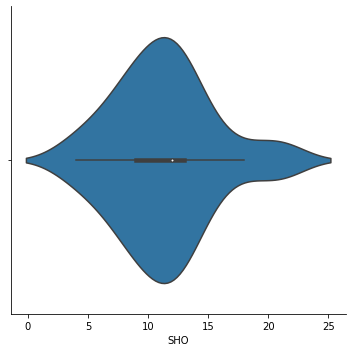

In [77]:
plt.figure(figsize=(8,5))
sns.catplot(data=df,x='SHO',kind='violin')

 Minimum Save:  28 And Maximum Save  62


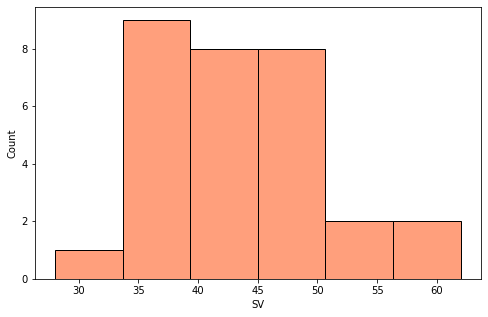

In [78]:
plt.figure(figsize=(8,5))
sns.histplot(data=df,x='SV',color='coral')
print(" Minimum Save: ",df['SV'].min(),'And Maximum Save ',df['SV'].max())

Minimum Save:  28 And Maximum Save  62

 Minimum Save:  28 And Maximum Save  62


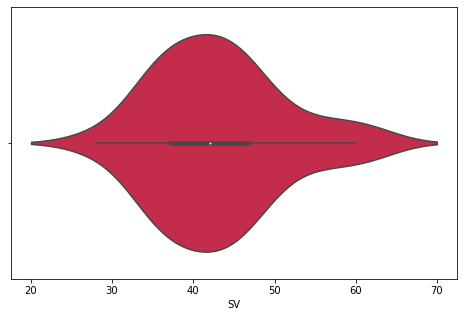

In [79]:
plt.figure(figsize=(8,5))
sns.violinplot(data=df,x='SV',color='crimson')
print(" Minimum Save: ",df['SV'].min(),'And Maximum Save ',df['SV'].max())

Maximum save are lies at 40 

 Minimum Error:  75 And Maximum Error  126


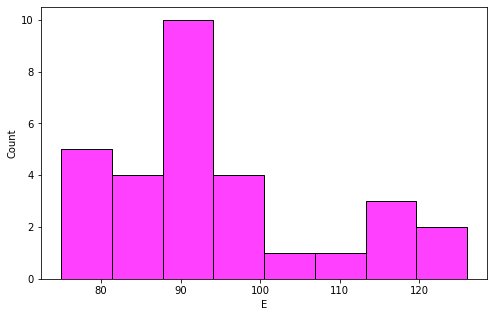

In [80]:
plt.figure(figsize=(8,5))
sns.histplot(data=df,x='E',color='magenta')
print(" Minimum Error: ",df['E'].min(),'And Maximum Error ',df['E'].max())

<AxesSubplot:xlabel='E'>

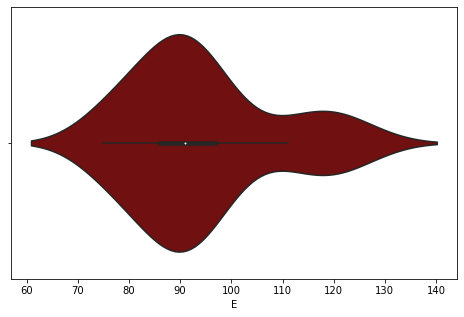

In [81]:
plt.figure(figsize=(8,5))
sns.violinplot(data=df,x='E',color='maroon')

Maximum Error count lies between 85 to 95

### Bi-Variate

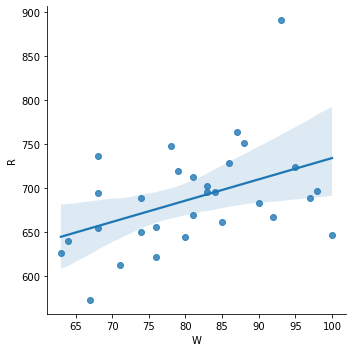

In [82]:
sns.lmplot(x='W',y='R',data=df,palette='colorblind')

Run having positive relation with wins

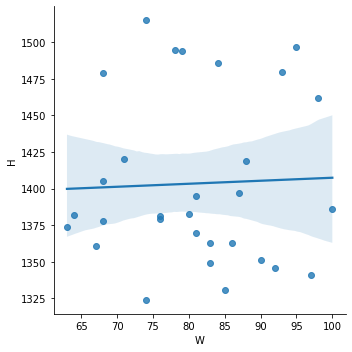

In [83]:
sns.lmplot(x='W',y='H',data=df)

Hits are not so positivly related with wins

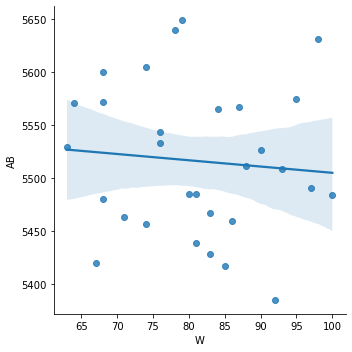

In [84]:
sns.lmplot(x='W',y='AB',data=df)

AB is not having much relation with Wins

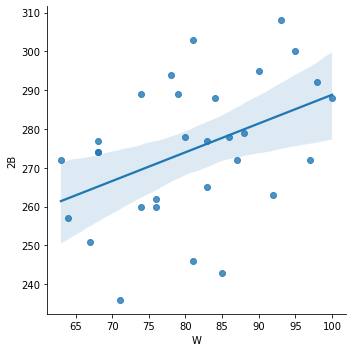

In [85]:
sns.lmplot(x='W',y='2B',data=df)

2B is having positive relation with W

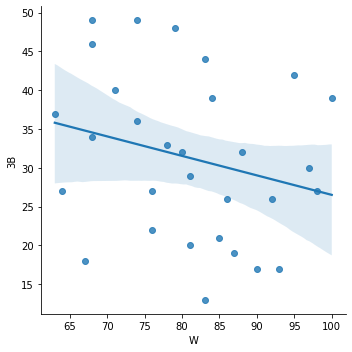

In [86]:
sns.lmplot(x='W',y='3B',data=df)

3B is negatively correlated with Wins

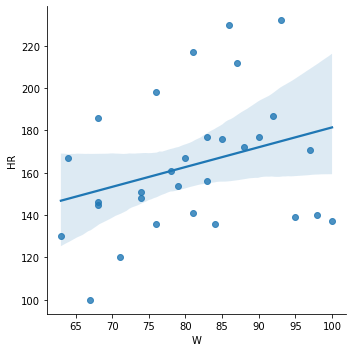

In [87]:
sns.lmplot(x='W',y='HR',data=df)

HR is having a Positive relation with Wins

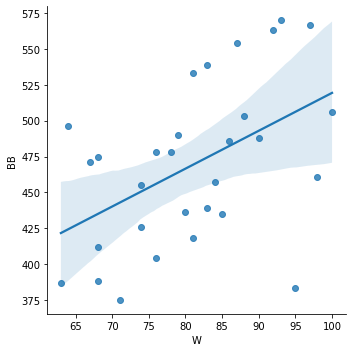

In [88]:
sns.lmplot(x='W',y='BB',data=df)

BB is positively related with Wins

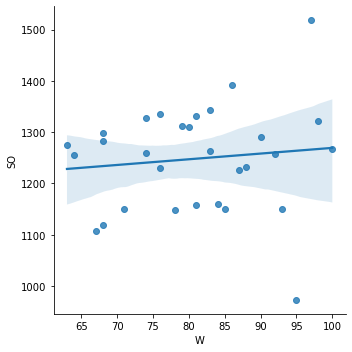

In [89]:
sns.lmplot(x='W',y='SO',data=df)

SO is not having a very good bond with Wins

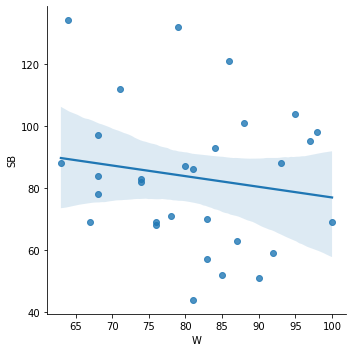

In [90]:
sns.lmplot(x='W',y='SB',data=df)

SB is negatively related with Wins

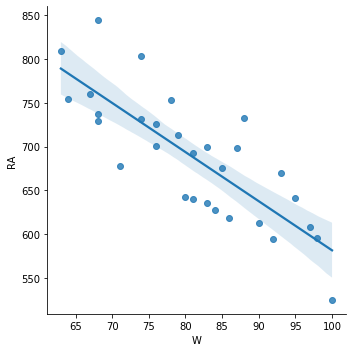

In [91]:
sns.lmplot(x='W',y='RA',data=df)

RA is negatively correlated with W

<AxesSubplot:xlabel='W', ylabel='RA'>

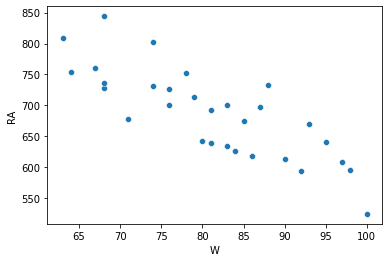

In [92]:
sns.scatterplot(x='W',y='RA',data=df)

RA having very poor relation with wins

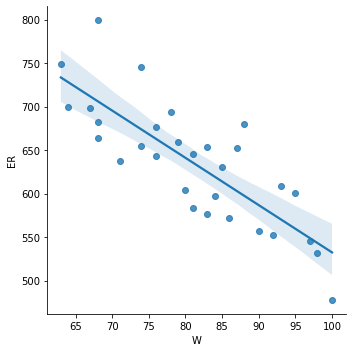

In [93]:
sns.lmplot(x='W',y='ER',data=df)

ER having very negative relation with Wins

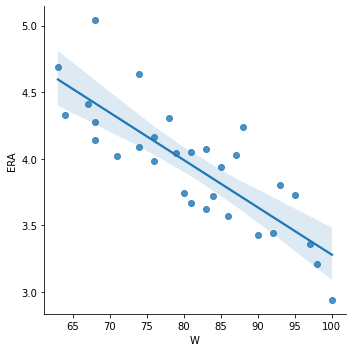

In [94]:
sns.lmplot(x='W',y='ERA',data=df)

ERA is having negative relation with wins

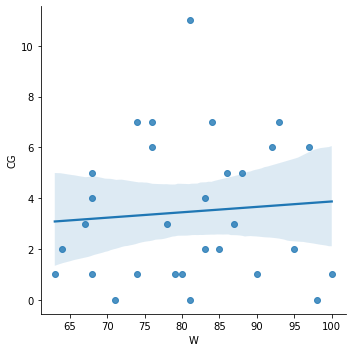

In [95]:
sns.lmplot(x='W',y='CG',data=df)

CG is having no such very good relation with W

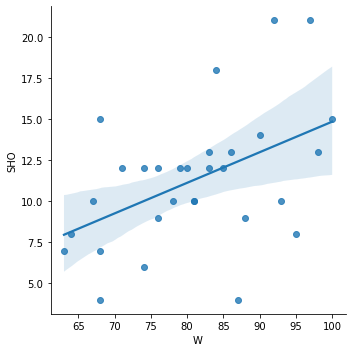

In [96]:
sns.lmplot(x='W',y='SHO',data=df)

SHO is very positively correlated with Wins

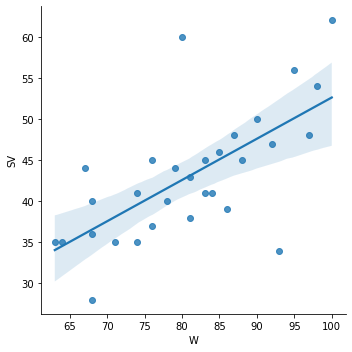

In [97]:
sns.lmplot(x='W',y='SV',data=df)

SV us very postive to W

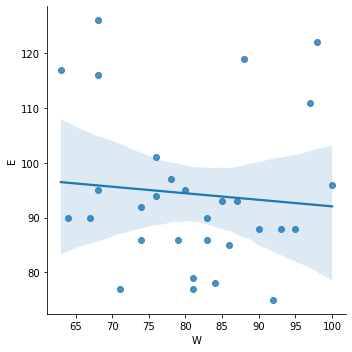

In [98]:
sns.lmplot(x='W',y='E',data=df)

Error is negative towards Wins

# Multivariate Analysis(Pair_plot)

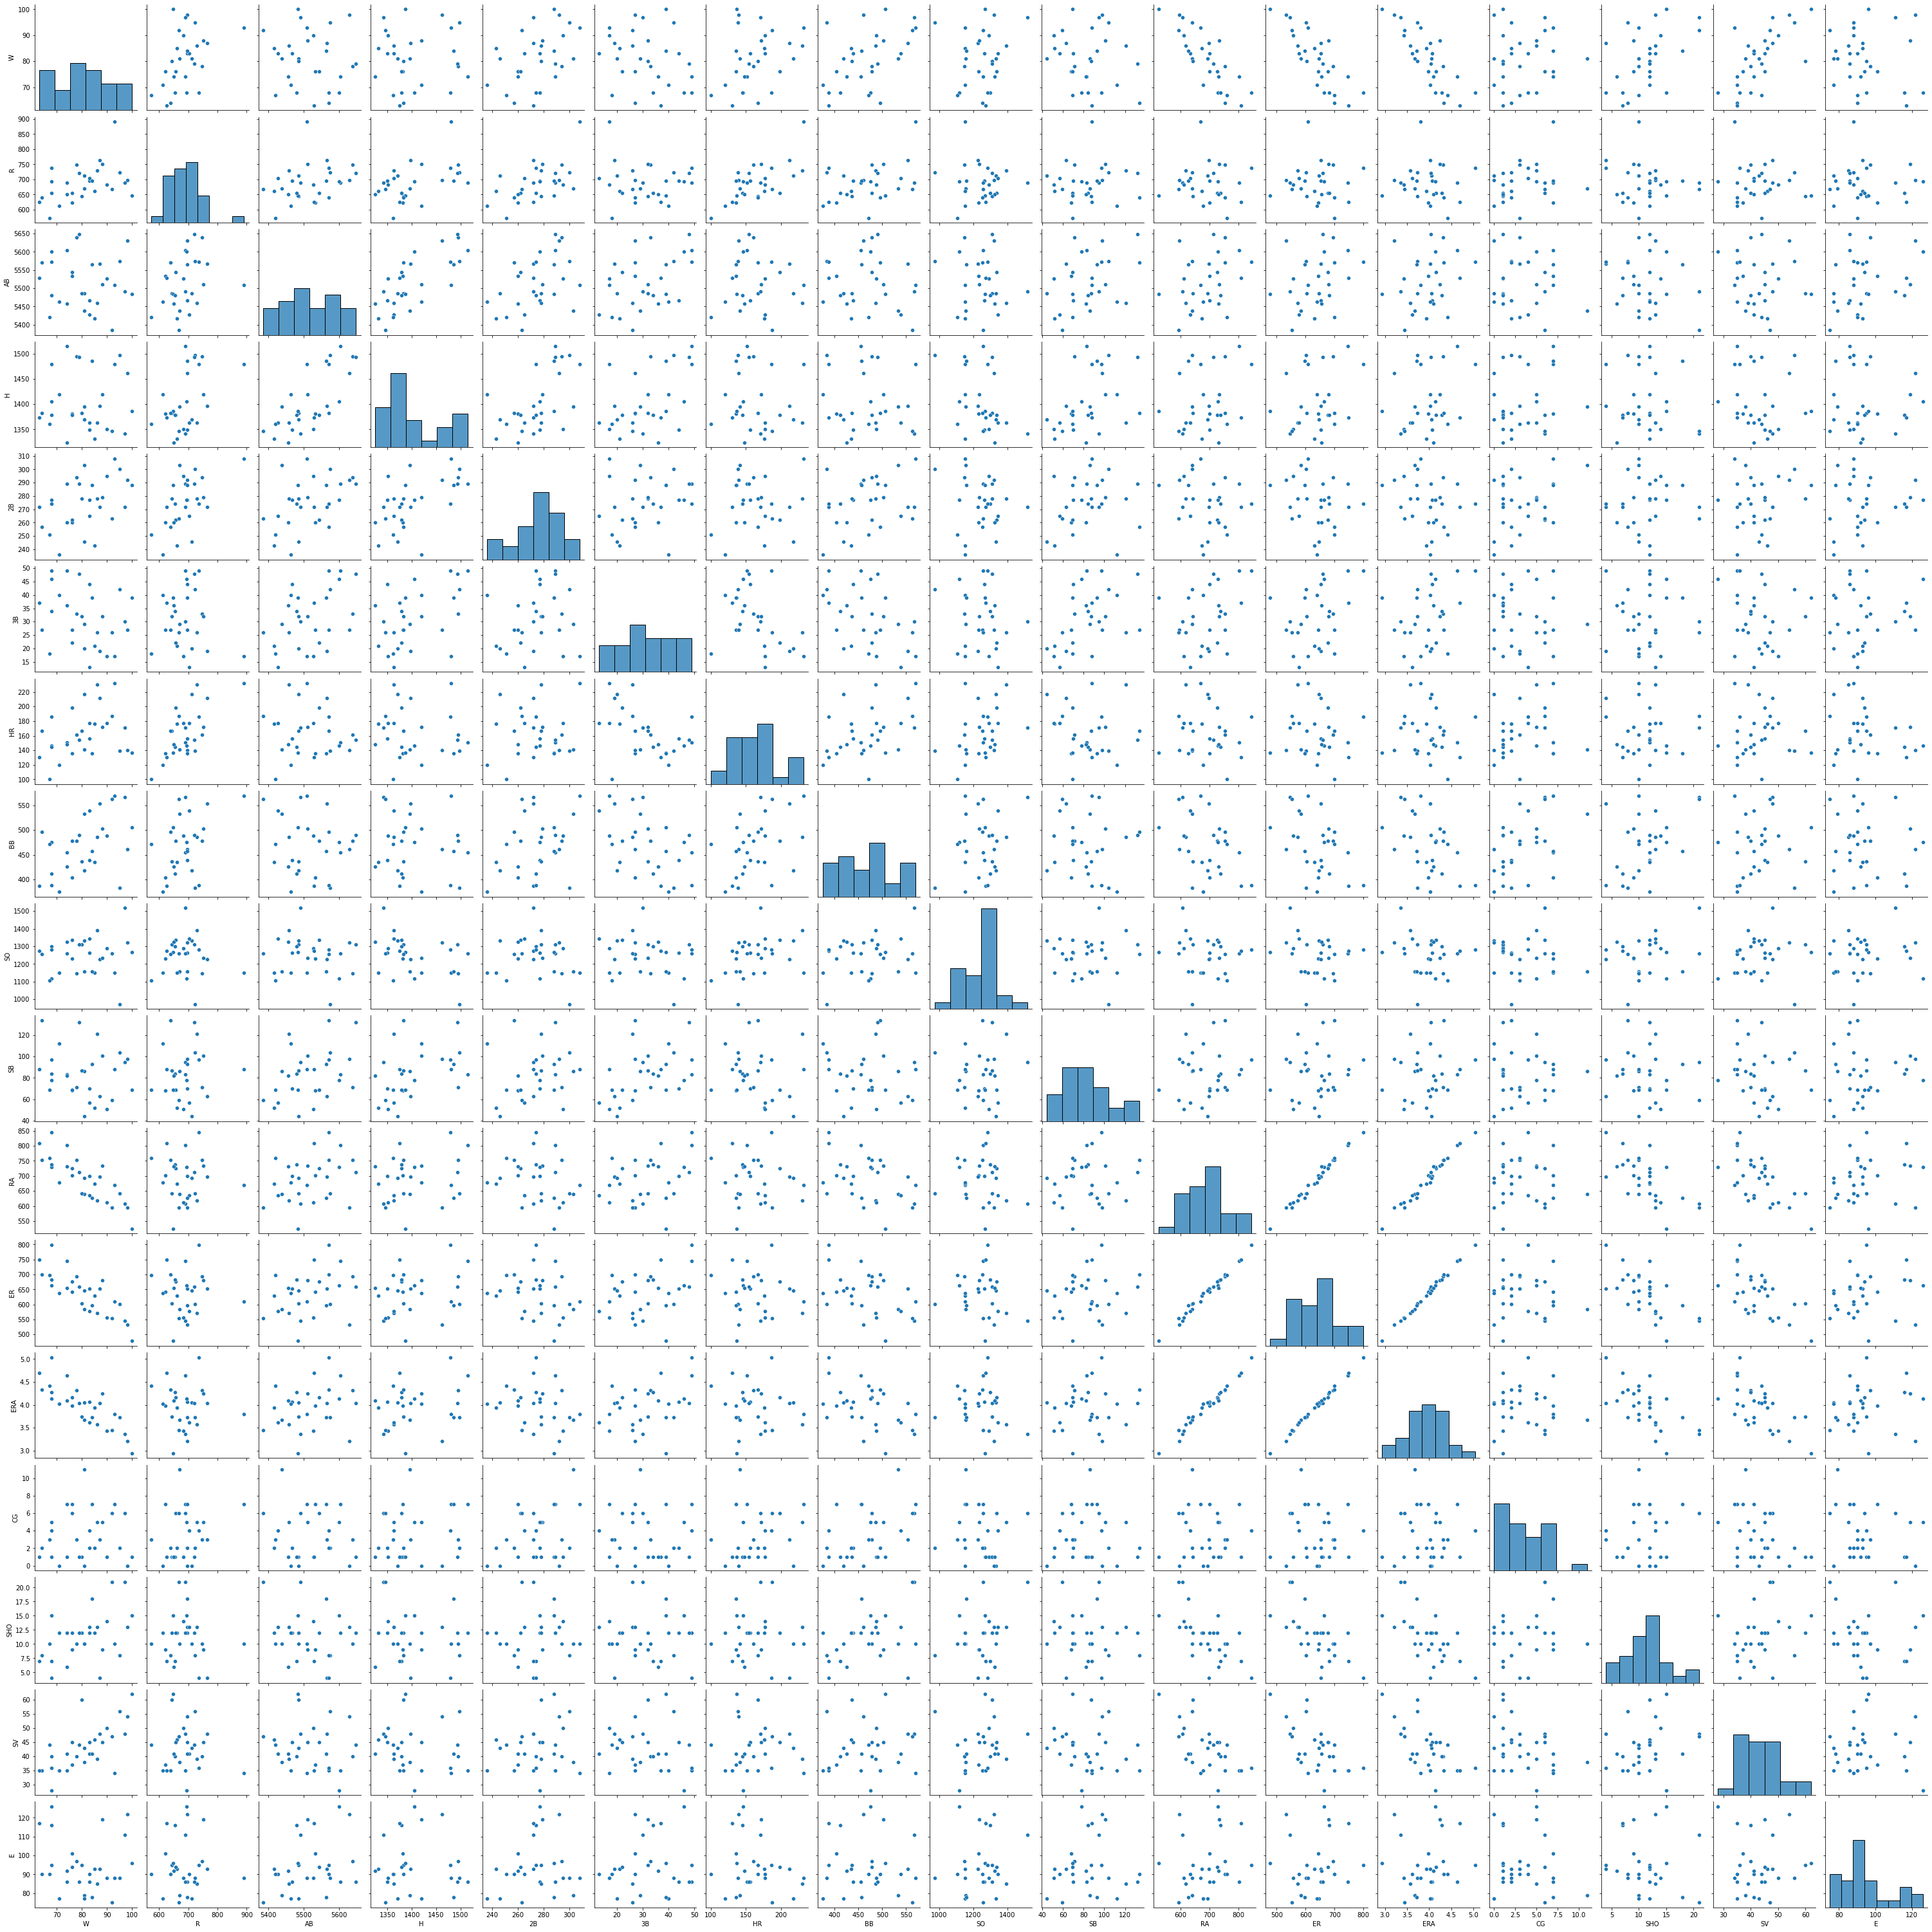

In [99]:
sns.pairplot(data=df)

# Descriptive Statistics

In [100]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


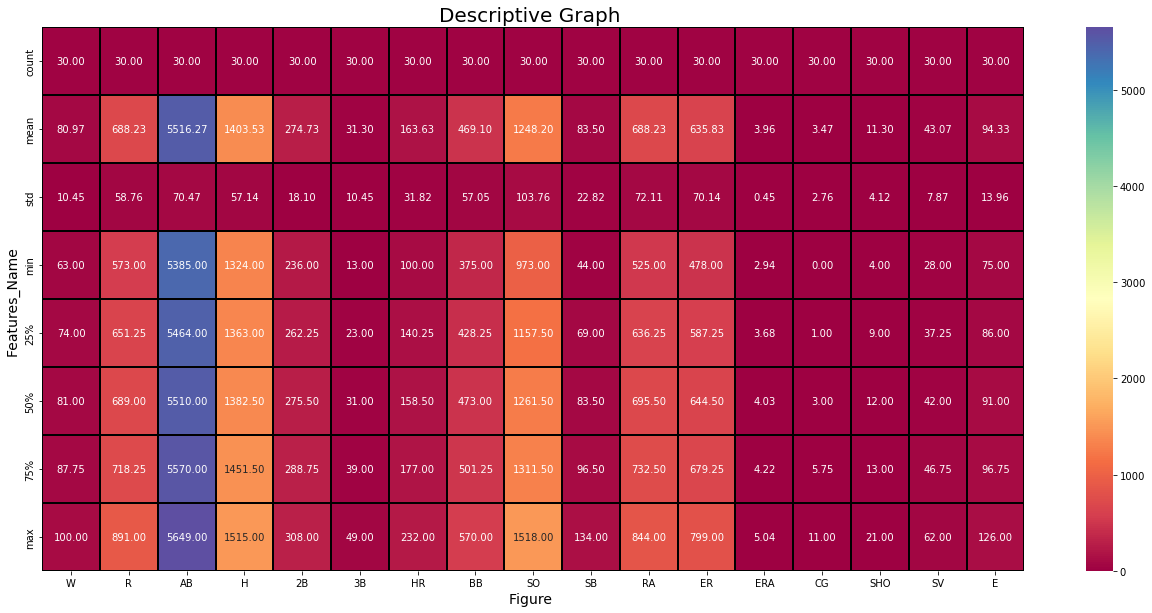

In [101]:
plt.figure(figsize=(22,10))
sns.heatmap(df.describe(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Spectral')
plt.xlabel('Figure ',fontsize=14)
plt.ylabel('Features_Name ',fontsize=14)
plt.title('Descriptive Graph ',fontsize=20)
plt.show()

### My Observation with columns:
--------------------------------
    
    1. Null Values     :No Null Values
    2. Right Skewed    :AB,H,HR,BB,SV,E
    3. Left Skewed     :R,2B,SO,RA,ER
    4. Standard Deviation :R,AB,H,2B,3B,HR,BB,SO,RA,ER,SV,E
    5. Outliers        :SO,RA,ER,E
    

# Correlation

In [102]:
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


In [103]:
df.corr().W.sort_values()

ERA   -0.819600
RA    -0.812952
ER    -0.809435
3B    -0.251118
SB    -0.157234
E     -0.089485
AB    -0.087947
H      0.037612
CG     0.080533
SO     0.111850
HR     0.307407
2B     0.427797
R      0.430751
SHO    0.471805
BB     0.484342
SV     0.666530
W      1.000000
Name: W, dtype: float64

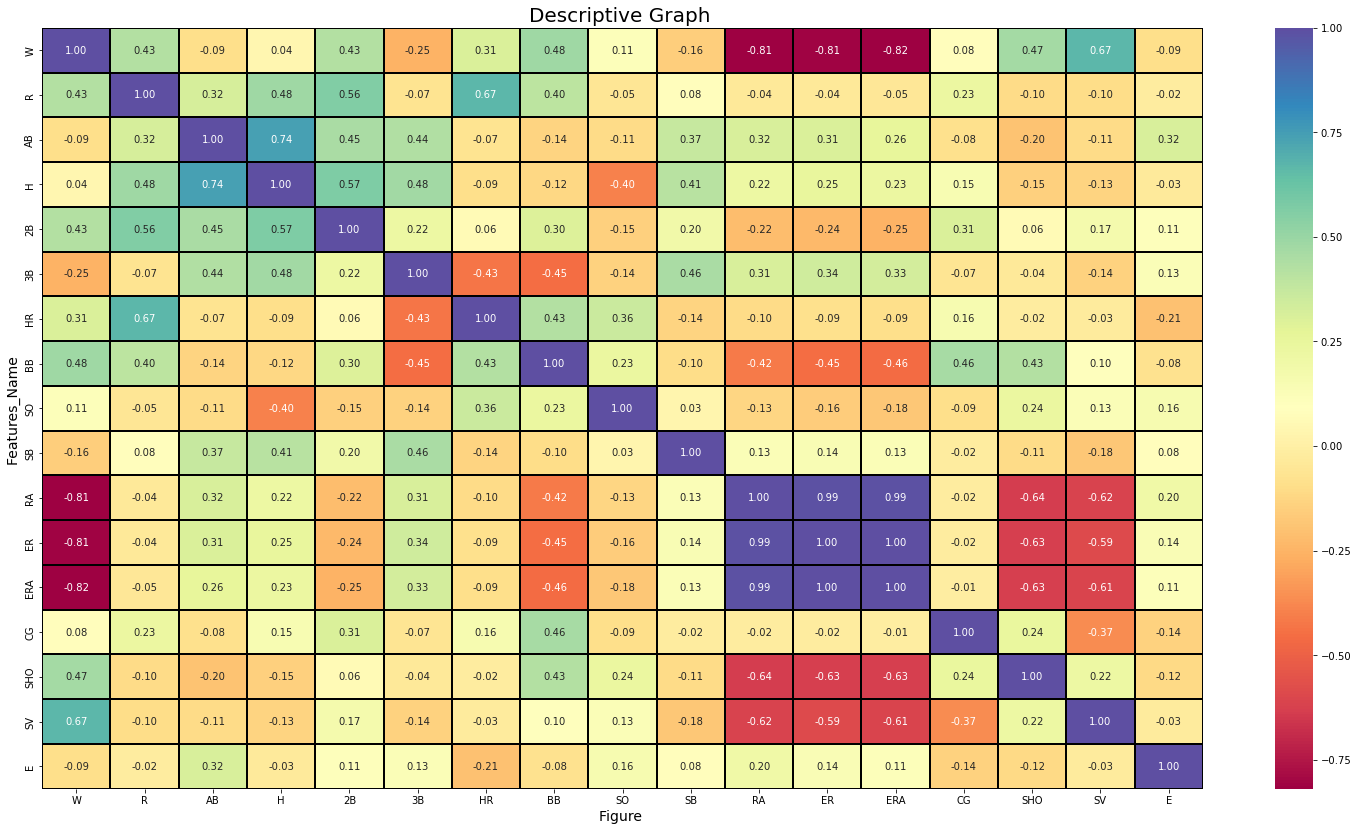

In [104]:
plt.figure(figsize=(26,14))
sns.heatmap(df.corr(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Spectral')
plt.xlabel('Figure ',fontsize=14)
plt.ylabel('Features_Name ',fontsize=14)
plt.title('Descriptive Graph ',fontsize=20)
plt.show()

## Observation
---------------------

01. ERA is 82 percentage negatively correlated with the target variable.
02. RA is  81 percentage negatively correlated with the target variable.
03. ER is 81 percentage negatively correlated with the target varible.
04. 3B is 25 percentage negatively correlated with the target variable.
05. SB is 15 percentage negatively correlated with the target variable.
06. E Error is 09 percentage negatively correlated with the target variable.
07. AB At Bats is 09 percentage negatively correlated with the target variable.
08. H (Hits) are 04 percentage positively correlated with the target variable.
09. CG (Complete Game) is 08 percentage positively correlated with the target variable.
10. SO (Strike-Outs) is 11 percentage positively correlated with the target variable.
11. HR (Home Runs)  is 30 percentage positively correlated with the target variable.
12. 2B (Doubles) is 42 percentage positively correlated with the target variable.
13. R (Runs) is 43 percentage positively correlated with the target variable.
14. SHO (Soutout) is 47 percentage positively correlated with target variable.
15. BB  (Base on balls) is 48 percentage positively correlated with target variable.
16. SV  (Save)  is 66 percentage postively correlated with target variable.
17. W is 100 percentage postively correlated with target variable.

`ERA is 81 percentage is negatively correlated.

``SV is 66 percentage is positively correlated.

Text(0.5, 1.0, 'CORRELATION')

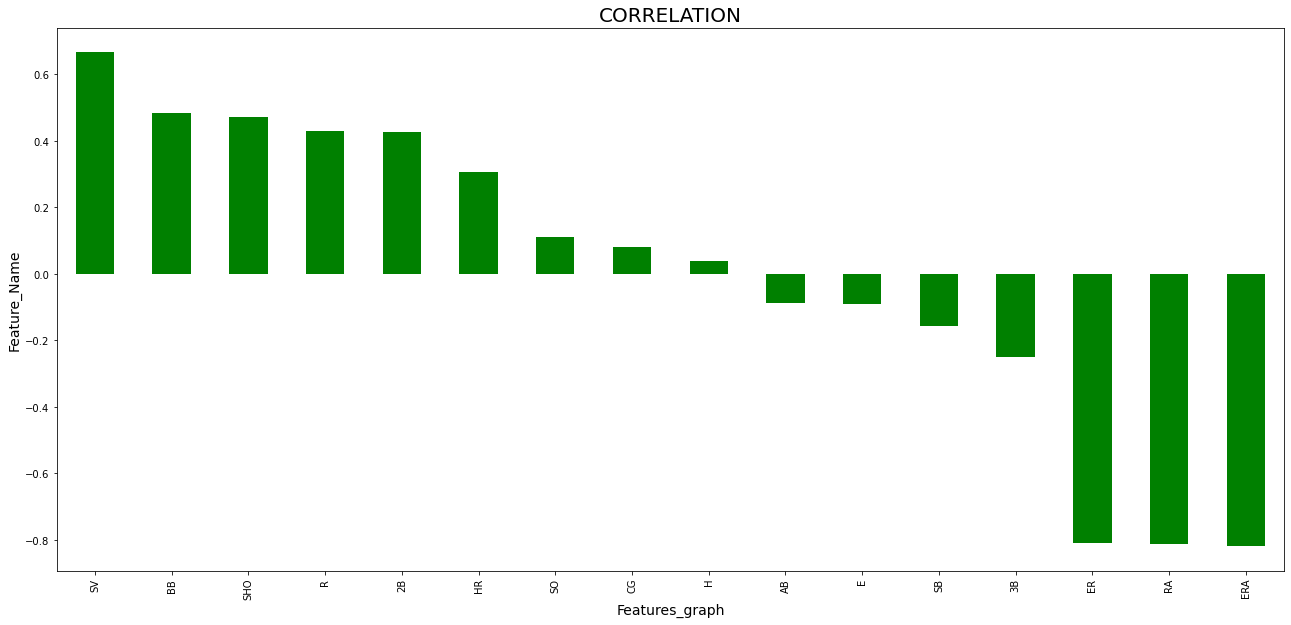

In [105]:
plt.figure(figsize=(22,10))
df.corr().W.sort_values(ascending=False).drop(['W']).plot(kind='bar',color='g')
plt.xlabel('Features_graph',fontsize=14)
plt.ylabel('Feature_Name',fontsize=14)
plt.title('CORRELATION',fontsize=20)

# Outliers

<AxesSubplot:xlabel='W'>

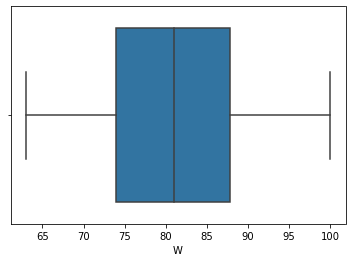

In [106]:
sns.boxplot(x='W',data=df)

Graph Shows No outliers

<AxesSubplot:xlabel='R'>

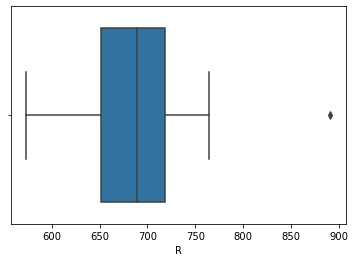

In [107]:
sns.boxplot(data=df,x='R')

Graph Shows Outliers

<AxesSubplot:xlabel='AB'>

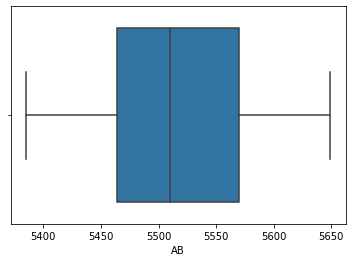

In [108]:
sns.boxplot(data=df,x='AB')

Graph Shows No Outliers

<AxesSubplot:xlabel='H'>

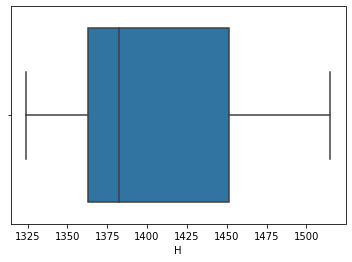

In [109]:
sns.boxplot(data=df,x='H')

Garph Shows No Outliers

<AxesSubplot:xlabel='2B'>

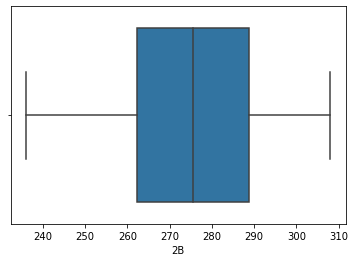

In [110]:
sns.boxplot(data=df,x='2B')

Graph Shows no outliers

<AxesSubplot:xlabel='3B'>

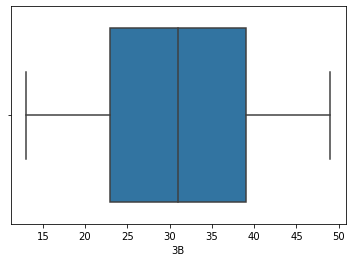

In [111]:
sns.boxplot(data=df,x='3B')

Graph Shows no outliers

<AxesSubplot:xlabel='HR'>

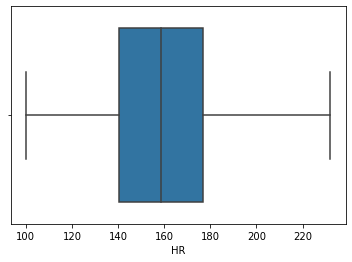

In [112]:
sns.boxplot(data=df,x='HR')

Graph Shows no Outliers

<AxesSubplot:xlabel='BB'>

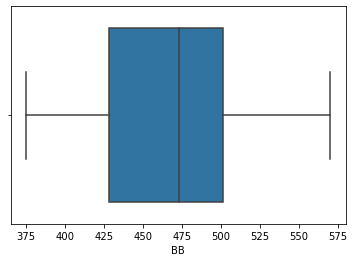

In [113]:
sns.boxplot(data=df,x='BB')

Graph Shows no Outliers

<AxesSubplot:xlabel='SO'>

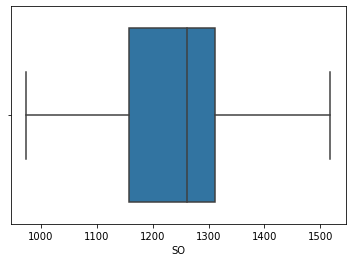

In [114]:
sns.boxplot(data=df,x='SO')

Graph Shows no Outliers

<AxesSubplot:xlabel='SB'>

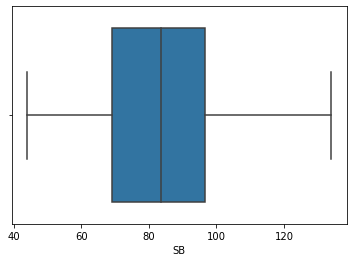

In [115]:
sns.boxplot(data=df,x='SB')

Graph Shows no Outliers

<AxesSubplot:xlabel='RA'>

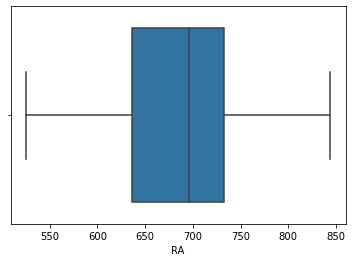

In [116]:
sns.boxplot(data=df,x='RA')

Graph Shows no Outliers

<AxesSubplot:xlabel='ER'>

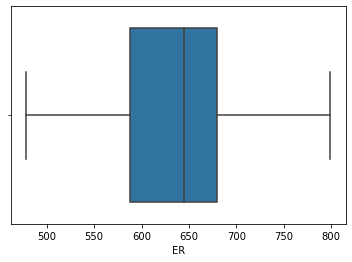

In [117]:
sns.boxplot(data=df,x='ER')

Graph Shows No Outliers

<AxesSubplot:xlabel='ERA'>

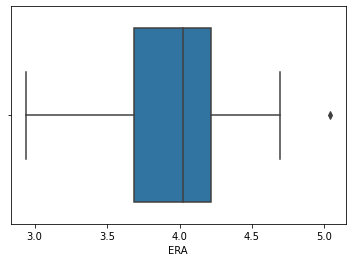

In [118]:
sns.boxplot(data=df,x='ERA')

Graph Shows Outliers

<AxesSubplot:xlabel='CG'>

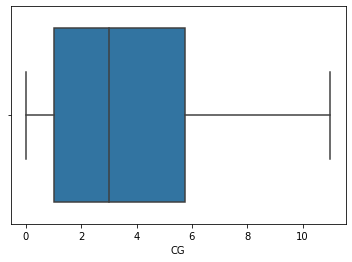

In [119]:
sns.boxplot(data=df,x='CG')

Graph Shows No Outliers

<AxesSubplot:xlabel='SHO'>

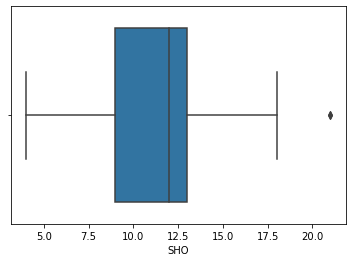

In [120]:
sns.boxplot(data=df,x='SHO')

Graph Shows Outliers

<AxesSubplot:xlabel='SV'>

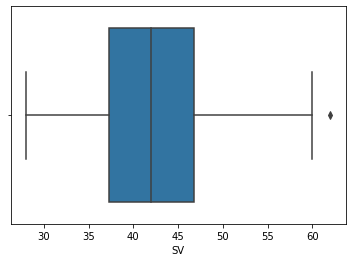

In [121]:
sns.boxplot(data=df,x='SV')

Graph Shows Outliers

<AxesSubplot:xlabel='E'>

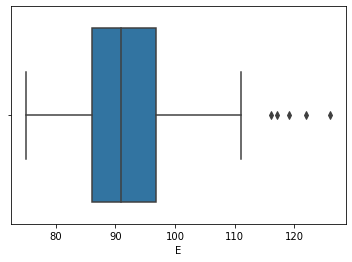

In [122]:
sns.boxplot(data=df,x='E')

Graph Shows Outliers

Overall Observation:
    E,SV,SHO,R,ERA Shows Outliers
    

# Skewness:

In [123]:
df.skew().sort_values()

2B    -0.230650
SO    -0.156065
RA     0.045734
W      0.047089
ERA    0.053331
ER     0.058710
3B     0.129502
BB     0.158498
AB     0.183437
SB     0.479893
HR     0.516441
SHO    0.565790
SV     0.657524
H      0.670254
CG     0.736845
E      0.890132
R      1.200786
dtype: float64

Skewness Threshold is taken is(+/-65).

Outcome shows, Column showing skewness are..
- SV
-  H
- CG
-  E
-  R 

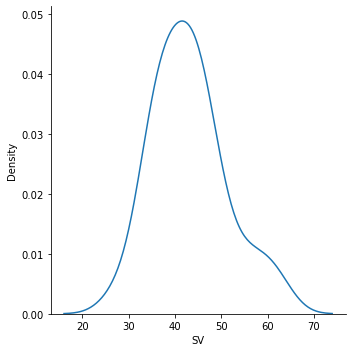

In [124]:
sns.displot(x='SV',data=df,kind='kde')

The data in the given graph shows is not normalised.The Building blocks are beyond the normal curve.

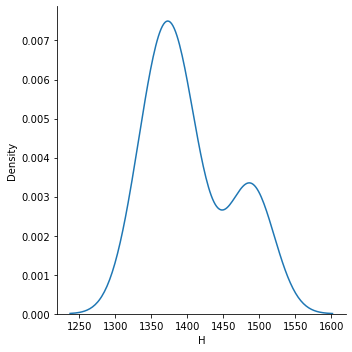

In [125]:
sns.displot(x='H',data=df,kind='kde')

The data in the given graph is not normalised. The Building Blocks are beyond the normal Curve, The given graph is bimodal (2-Modes)

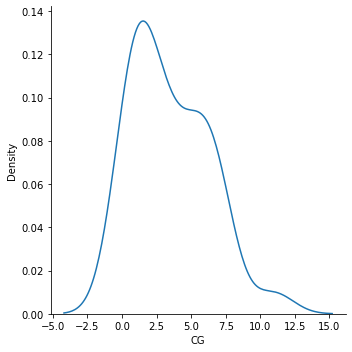

In [126]:
sns.displot(x='CG',data=df,kind='kde')

The data in the given graph is not normalised.The building Blocks are beyond the normal Curve, graphs seems to be try model

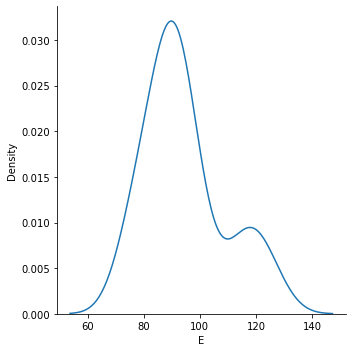

In [127]:
sns.displot(x='E',data=df,kind='kde')

The data in the given graph is not normalised. The building Blocks are beyond the normal Curve. Graph shows that is Bimodal (2modes)

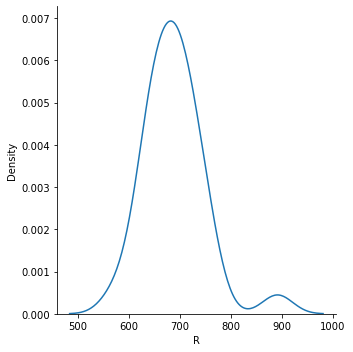

In [128]:
sns.displot(x='R',data=df,kind='kde')

The Data in the given graph is not normalised.The Building Blocks are beyond the normal Curve.Graph shows that is BiModal (2 modes)

# Data Cleansing

In [129]:
#checking correlation.

df.corr().W.sort_values()

ERA   -0.819600
RA    -0.812952
ER    -0.809435
3B    -0.251118
SB    -0.157234
E     -0.089485
AB    -0.087947
H      0.037612
CG     0.080533
SO     0.111850
HR     0.307407
2B     0.427797
R      0.430751
SHO    0.471805
BB     0.484342
SV     0.666530
W      1.000000
Name: W, dtype: float64

In [130]:
# ERA shows very negative relation with target variable.
# H having no such good relation with the target variable and its close to zero.
# CG shows no such relation and is close to zero.

In [131]:
delete=pd.DataFrame(data={'Columns':['H','CG','AB','E'],
                         'Values':[0.037612,0.080533,-0.087947,-0.089485],
                         'Outliers':['NO','NO','NO','YES'],
                         'Normalised':['NO','NO','NO','YES']})

#Overall Observation: Shows Outliers E,SV,SHO,R,ERA 
#Outcome shows: Column showing skewness are SV,H,CG,E,R

In [132]:
delete

,Columns,Values,Outliers,Normalised
0,H,0.037612,NO,NO
1,CG,0.080533,NO,NO
2,AB,-0.087947,NO,NO
3,E,-0.089485,YES,YES


In [133]:
df.drop(['H','CG','AB','E'],axis=1,inplace=True)

In [134]:
df.head()

,W,R,2B,3B,HR,BB,SO,SB,RA,ER,ERA,SHO,SV
0,95,724,300,42,139,383,973,104,641,601,3.73,8,56
1,83,696,277,44,156,439,1264,70,700,653,4.07,12,45
2,81,669,303,29,141,533,1157,86,640,584,3.67,10,38
3,76,622,260,27,136,404,1231,68,701,643,3.98,9,37
4,74,689,289,49,151,455,1259,83,803,746,4.64,12,35


## Removing Outliers

In [135]:
from scipy.stats import zscore
z=np.abs(zscore(df))

In [136]:
#checking Z
z.head() #data shifted to positive

,W,R,2B,3B,HR,BB,SO,SB,RA,ER,ERA,SHO,SV
0,1.365409,0.619078,1.420173,1.041193,0.787299,1.534902,2.697630,0.913883,0.666234,0.505110,0.506955,0.814629,1.671607
1,0.197838,0.134432,0.127403,1.235809,0.243967,0.536592,0.154878,0.601826,0.165971,0.248930,0.254598,0.172800,0.249879
2,0.003243,0.332906,1.588795,0.223808,0.723377,1.139144,0.893982,0.111449,0.680339,0.751623,0.641347,0.320914,0.654856
3,0.483244,1.146419,0.828122,0.418423,0.883181,1.160536,0.168602,0.690985,0.180076,0.103922,0.053010,0.567771,0.784104
4,0.677839,0.013270,0.801892,1.722347,0.403770,0.251360,0.105866,0.022290,1.618803,1.597501,1.531318,0.172800,1.042600


In [137]:
# threshold=3
np.where(z>3)

(array([5], dtype=int64), array([1], dtype=int64))

In [138]:
z.iloc[5,1]

3.5096470447193067

In [139]:
new_df=df[(z<3).all(axis=1)]

In [140]:
new_df.head()

,W,R,2B,3B,HR,BB,SO,SB,RA,ER,ERA,SHO,SV
0,95,724,300,42,139,383,973,104,641,601,3.73,8,56
1,83,696,277,44,156,439,1264,70,700,653,4.07,12,45
2,81,669,303,29,141,533,1157,86,640,584,3.67,10,38
3,76,622,260,27,136,404,1231,68,701,643,3.98,9,37
4,74,689,289,49,151,455,1259,83,803,746,4.64,12,35


### Data Loss percentage

In [141]:
print("Old Data Frame",df.shape[0])
print("New Data Frame",new_df.shape[0])

Old Data Frame 30
New Data Frame 29


In [142]:
print("Data Loss Percentage ",((df.shape[0]-new_df.shape[0])/df.shape[0])*100)

Data Loss Percentage  3.3333333333333335


In [143]:
x=new_df.iloc[:,1:]

In [144]:
x

,R,2B,3B,HR,BB,SO,SB,RA,ER,ERA,SHO,SV
0,724,300,42,139,383,973,104,641,601,3.73,8,56
1,696,277,44,156,439,1264,70,700,653,4.07,12,45
2,669,303,29,141,533,1157,86,640,584,3.67,10,38
3,622,260,27,136,404,1231,68,701,643,3.98,9,37
4,689,289,49,151,455,1259,83,803,746,4.64,12,35
6,764,272,19,212,554,1227,63,698,652,4.03,4,48
7,713,246,20,217,418,1331,44,693,646,4.05,10,43
8,644,278,32,167,436,1310,87,642,604,3.74,12,60
9,748,294,33,161,478,1148,71,753,694,4.31,10,40
10,751,279,32,172,503,1233,101,733,680,4.24,9,45


In [145]:
y=new_df.iloc[:,0]

In [146]:
y

0      95
1      83
2      81
3      76
4      74
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

In [147]:
print("Shape of X is",x.shape,"Shape of Y is ",y.shape)

Shape of X is (29, 12) Shape of Y is  (29,)


# Checking Multicolinarity

In [148]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(x):
    vif=pd.DataFrame()
    vif['Variable']=x.columns
    vif['VIF Factors']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return vif
    

In [149]:
calc_vif(x)

,Variable,VIF Factors
0,R,819.178784
1,2B,569.500326
2,3B,30.385316
3,HR,177.034315
4,BB,186.881327
5,SO,374.951549
6,SB,24.476939
7,RA,13581.652934
8,ER,42097.380116
9,ERA,19561.689478


In [150]:
x.drop(['ER'],axis=1,inplace=True)

In [151]:
calc_vif(x)

,Variable,VIF Factors
0,R,792.694198
1,2B,569.494814
2,3B,29.350261
3,HR,136.852944
4,BB,180.892055
5,SO,305.783984
6,SB,21.100629
7,RA,6175.770802
8,ERA,4896.337287
9,SHO,20.408370


In [152]:
x.drop(['RA'],axis=1,inplace=True)

In [153]:
calc_vif(x)

,Variable,VIF Factors
0,R,785.889717
1,2B,557.815364
2,3B,29.086407
3,HR,114.083620
4,BB,171.648417
5,SO,211.476164
6,SB,20.769236
7,ERA,119.668758
8,SHO,17.875465
9,SV,51.618998


# Remove Skewness

In [154]:
from sklearn.preprocessing import power_transform

x=power_transform(x,method='yeo-johnson')

In [155]:
x

array([[ 9.62543504e-01,  1.68518793e+00,  1.00615029e+00,
        -7.41927000e-01, -1.60519802e+00, -2.55061247e+00,
         9.36131648e-01, -5.09292146e-01, -7.87002186e-01,
         1.53275292e+00],
       [ 2.98863300e-01,  1.38197902e-01,  1.18522654e+00,
        -1.09958425e-01, -4.62095966e-01,  9.36832915e-02,
        -5.16377335e-01,  2.41440214e-01,  2.36736538e-01,
         3.12020186e-01],
       [-3.12105130e-01,  1.90738550e+00, -2.28819392e-01,
        -6.64354121e-01,  1.23209786e+00, -9.35611465e-01,
         2.25038365e-01, -6.42097599e-01, -2.52844176e-01,
        -6.64136739e-01],
       [-1.30829774e+00, -8.37664770e-01, -4.32227907e-01,
        -8.60039342e-01, -1.16272085e+00, -2.30682707e-01,
        -6.18421529e-01,  4.30132461e-02, -5.13554932e-01,
        -8.20688859e-01],
       [ 1.37737301e-01,  9.11434794e-01,  1.62263592e+00,
        -2.89646675e-01, -1.55685826e-01,  4.41433307e-02,
         9.50377681e-02,  1.49349103e+00,  2.36736538e-01,
        -1.

In [156]:
x=pd.DataFrame(data=x,columns=['R','2B','3B','HR','BB','SO','SB','ERA','SHO','SV'])

In [157]:
x.head()

,R,2B,3B,HR,BB,SO,SB,ERA,SHO,SV
0,0.962544,1.685188,1.006150,-0.741927,-1.605198,-2.550612,0.936132,-0.509292,-0.787002,1.532753
1,0.298863,0.138198,1.185227,-0.109958,-0.462096,0.093683,-0.516377,0.241440,0.236737,0.312020
2,-0.312105,1.907385,-0.228819,-0.664354,1.232098,-0.935611,0.225038,-0.642098,-0.252844,-0.664137
3,-1.308298,-0.837665,-0.432228,-0.860039,-1.162721,-0.230683,-0.618422,0.043013,-0.513555,-0.820689
4,0.137737,0.911435,1.622636,-0.289647,-0.155686,0.044143,0.095038,1.493491,0.236737,-1.149165


In [158]:
x.skew()

R     -0.024842
2B    -0.052793
3B    -0.075139
HR     0.000448
BB    -0.008572
SO     0.051530
SB    -0.009570
ERA   -0.000401
SHO    0.000529
SV    -0.000925
dtype: float64

## Standardization

In [159]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

x=scaler.fit_transform(x)

In [160]:
print("Mean ",round(x.mean()))
print("Standard Deviation ",round(x.std()))

Mean  0
Standard Deviation  1


# PCA

In [161]:
from sklearn.decomposition import PCA
pca=PCA(n_components=6)

x=pca.fit_transform(x)

## Target Varible

In [162]:
y.unique()

array([ 95,  83,  81,  76,  74,  87,  80,  78,  88,  86,  85,  68, 100,
        98,  97,  64,  90,  71,  67,  63,  92,  84,  79], dtype=int64)

However the value in target variable is continious we can use Linear Regression.

# Model Selection

## Linear Regression

In [163]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [164]:
from sklearn.model_selection import train_test_split

In [165]:
for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.2)
    lr.fit(x_train,y_train)
    
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    
    if round(r2_score(y_train,pred_train),2)==round(r2_score(y_test,pred_test),2):
        print(f"At random State {i},The r2 train score {r2_score(y_train,pred_train)}, r2 test score {r2_score(y_test,pred_test)}")

At random State 3,The r2 train score 0.8538129811927293, r2 test score 0.8535142984039996
At random State 20,The r2 train score 0.851892336538352, r2 test score 0.8467677423040136
At random State 121,The r2 train score 0.8267560329983941, r2 test score 0.8311860929397091
At random State 129,The r2 train score 0.8593755925940662, r2 test score 0.8622658124338108
At random State 146,The r2 train score 0.8536300590438131, r2 test score 0.850229373807922
At random State 182,The r2 train score 0.8498412364457117, r2 test score 0.8480411744340296
At random State 260,The r2 train score 0.8522217929155116, r2 test score 0.850408197518394
At random State 292,The r2 train score 0.8539115883612888, r2 test score 0.8458889619407111
At random State 332,The r2 train score 0.8519565190492624, r2 test score 0.8502916422739638
At random State 434,The r2 train score 0.8384153358832418, r2 test score 0.841309835760591
At random State 556,The r2 train score 0.8563287515840796, r2 test score 0.864989039224

### Train Test Split

In [166]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=3,test_size=0.2)

#training 
lr.fit(x_train,y_train)
lr_score=lr.score(x_train,y_train)

#predict
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)

#result
print("Training Accuracy r2_score ",r2_score(y_train,pred_train)*100,"Testing Accuracy R2_score ",r2_score(y_test,pred_test)*100)
print("Training Mean_squared_Error ",mean_squared_error(y_train,pred_train),"Testing Mean_squared_error ",mean_squared_error(y_test,pred_test))
print("Training Absolute_Error ",mean_absolute_error(y_train,pred_train),"Testing Absolute Error",mean_absolute_error(y_test,pred_test))

Training Accuracy r2_score  85.38129811927293 Testing Accuracy R2_score  85.35142984039996
Training Mean_squared_Error  12.645038953843274 Testing Mean_squared_error  25.130435918247162
Training Absolute_Error  2.796688348021996 Testing Absolute Error 4.7148919727346525


In [167]:
lr.coef_

array([ 4.08333632, -2.46275462, -1.31748197, -2.52519681, -1.95244988,
       -1.64007362])

### Cross Validation for Linear Regression

In [168]:
from sklearn.model_selection import cross_val_score

#training accuracy.
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

for i in range(2,10):
    lr_cv_score=cross_val_score(lr,x,y,cv=i)
    cv_mean=lr_cv_score.mean()

    print(f"At CROSS_FOLD {i}, Cross_Val_Mean {cv_mean} ,Training Score is {train_accuracy}, Testing Score {test_accuracy}")

At CROSS_FOLD 2, Cross_Val_Mean 0.5411795846592753 ,Training Score is 0.8538129811927293, Testing Score 0.8535142984039996
At CROSS_FOLD 3, Cross_Val_Mean 0.3192420952217228 ,Training Score is 0.8538129811927293, Testing Score 0.8535142984039996
At CROSS_FOLD 4, Cross_Val_Mean 0.6729308936639891 ,Training Score is 0.8538129811927293, Testing Score 0.8535142984039996
At CROSS_FOLD 5, Cross_Val_Mean 0.18382041109196295 ,Training Score is 0.8538129811927293, Testing Score 0.8535142984039996
At CROSS_FOLD 6, Cross_Val_Mean 0.2000246940401911 ,Training Score is 0.8538129811927293, Testing Score 0.8535142984039996
At CROSS_FOLD 7, Cross_Val_Mean 0.0711081689122074 ,Training Score is 0.8538129811927293, Testing Score 0.8535142984039996
At CROSS_FOLD 8, Cross_Val_Mean 0.2918302499191931 ,Training Score is 0.8538129811927293, Testing Score 0.8535142984039996
At CROSS_FOLD 9, Cross_Val_Mean -3.6271661335845113 ,Training Score is 0.8538129811927293, Testing Score 0.8535142984039996


### Cross fold 4 has the minimum difference between them. Hence we select 4.

In [169]:
# pred training for linear regression
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

#cross val with linear regression
lr_cv_score=cross_val_score(lr,x,y,cv=4) 
lr_mean=lr_cv_score.mean() #mean value

print("Cv_score of Model is ",lr_mean," The Training Score is ", train_accuracy," Testing Score Stands " ,test_accuracy)

Cv_score of Model is  0.6729308936639891  The Training Score is  0.8538129811927293  Testing Score Stands  0.8535142984039996


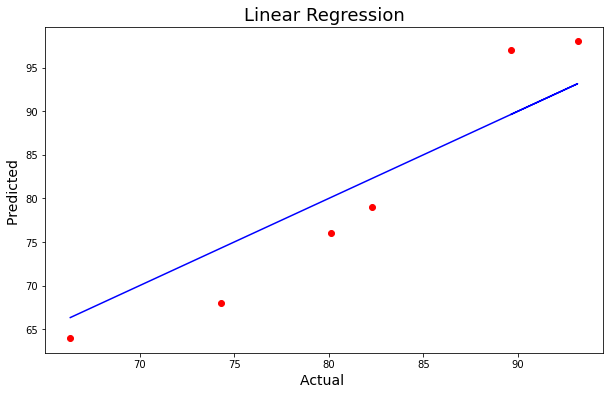

In [170]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_test,y=y_test,color='r')
plt.plot(pred_test,pred_test,color='b')
plt.xlabel('Actual ',fontsize=14)
plt.ylabel('Predicted ',fontsize=14)
plt.title("Linear Regression",fontsize=18)
plt.show()

### Hyper Parameter Regularlization-Linear Regression

In [171]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,100))}
ls=Lasso()
gsv=GridSearchCV(ls,parameters)
gsv.fit(x_train,y_train)

print("Best Score ",gsv.best_score_,"Best Parameter ",gsv.best_params_)

Best Score  0.564423820488795 Best Parameter  {'alpha': 0.1, 'random_state': 0}


In [172]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
parameter={'alpha':[0.0001,0.001,0.01,0.1,1],'solver':['auto','svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']}
rd=Ridge()
gsv=GridSearchCV(rd,parameter)
gsv.fit(x_train,y_train)

print(gsv.best_params_)
print(gsv.best_score_) 

{'alpha': 1, 'solver': 'sag'}
0.5758242174732014


In [173]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
parameter={'alpha':[0.0001,0.001,0.01,0.1,1],'selection':['cyclic', 'random'],'random_state':list(range(0,100)),'max_iter':[1000,2000,3000,4000,5000]}
en=ElasticNet()
gsv=GridSearchCV(en,parameter)
gsv.fit(x_train,y_train)

print(gsv.best_params_)
print(gsv.best_score_) 

{'alpha': 0.1, 'max_iter': 1000, 'random_state': 49, 'selection': 'random'}
0.5743036605814289


### Score of Elastic Net is better so we will use go with ElasticNET 

In [174]:
from sklearn.linear_model import ElasticNet
# Elastic Net Model
en=ElasticNet(alpha=0.01,max_iter=1000,random_state=49,selection='random')
en.fit(x_train,y_train)

# training score
en_score_training=en.score(x_train,y_train)
en_score_training*100

85.37973465258317

In [175]:
pred_en=en.predict(x_test) # predict test

en_cv_score=cross_val_score(en,x,y,cv=4)
en_cv_mean=en_cv_score.mean()
en_cv_mean

0.6743636682499687

In [176]:
print(en.intercept_,"\n", en.coef_) 

80.69069892606367 
 [ 4.07471997 -2.45378182 -1.30965222 -2.50601948 -1.93878302 -1.61069938]


In [177]:
rd_check=Ridge(alpha=1,solver='saga')
rd_check.fit(x_train,y_train)
rd_check.coef_

array([ 4.02234098, -2.4074424 , -1.2756803 , -2.41481473, -1.85768048,
       -1.4874201 ])

### Working with Other Regression Models

# Decision Tree Model

In [178]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()

#training Dtc model
dtr.fit(x_train,y_train)
dtr_score=dtr.score(x_train,y_train)

#predict dtc
pred_train=dtr.predict(x_train)
pred_test=dtr.predict(x_test)

#result dtc
print("Training Accuracy r2_score ",r2_score(y_train,pred_train),"Testing Accuracy R2_score ",r2_score(y_test,pred_test))
print("Training Mean_squared_Error ",mean_squared_error(y_train,pred_train),"Testing Mean_squared_error ",mean_squared_error(y_test,pred_test))
print("Training Absolute_Error ",mean_absolute_error(y_train,pred_train),"Testing Absolute Error",mean_absolute_error(y_test,pred_test))

Training Accuracy r2_score  1.0 Testing Accuracy R2_score  0.02266839378238339
Training Mean_squared_Error  0.0 Testing Mean_squared_error  167.66666666666666
Training Absolute_Error  0.0 Testing Absolute Error 12.333333333333334


### Cross Validation with Decision Tree Model

In [179]:
from sklearn.model_selection import cross_val_score

#training accuracy.
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

for i in range(2,10):
    dtr_cv_score=cross_val_score(dtr,x,y,cv=i)
    cv_mean=dtr_cv_score.mean()

    print(f"At CROSS_FOLD {i}, The Cross_Val_Mean{cv_mean} ,The Training Score is {train_accuracy}, Testing Score {test_accuracy}")

At CROSS_FOLD 2, The Cross_Val_Mean-0.7131694669023156 ,The Training Score is 1.0, Testing Score 0.02266839378238339
At CROSS_FOLD 3, The Cross_Val_Mean-1.149871367219619 ,The Training Score is 1.0, Testing Score 0.02266839378238339
At CROSS_FOLD 4, The Cross_Val_Mean-0.6188563031041701 ,The Training Score is 1.0, Testing Score 0.02266839378238339
At CROSS_FOLD 5, The Cross_Val_Mean-1.0766738558554596 ,The Training Score is 1.0, Testing Score 0.02266839378238339
At CROSS_FOLD 6, The Cross_Val_Mean-2.1599407322401305 ,The Training Score is 1.0, Testing Score 0.02266839378238339
At CROSS_FOLD 7, The Cross_Val_Mean-2.9616847528278023 ,The Training Score is 1.0, Testing Score 0.02266839378238339
At CROSS_FOLD 8, The Cross_Val_Mean-2.050769291465874 ,The Training Score is 1.0, Testing Score 0.02266839378238339
At CROSS_FOLD 9, The Cross_Val_Mean-21.97368271199481 ,The Training Score is 1.0, Testing Score 0.02266839378238339


### Checking Cross Validation at CROSS_FOLD 4

In [180]:
# As this Cross Fold point 4 Cross_Val_Score is near to training score.

# pred training for dtc
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

#cross val with dtc
dtr_cv_score=cross_val_score(dtr,x,y,cv=4) 
dtr_mean=dtr_cv_score.mean() #mean value

print("Cv_score of Model is ",dtr_mean," The Training Score is ", train_accuracy," Testing Score Stands " ,test_accuracy)

Cv_score of Model is  -0.716333957923405  The Training Score is  1.0  Testing Score Stands  0.02266839378238339


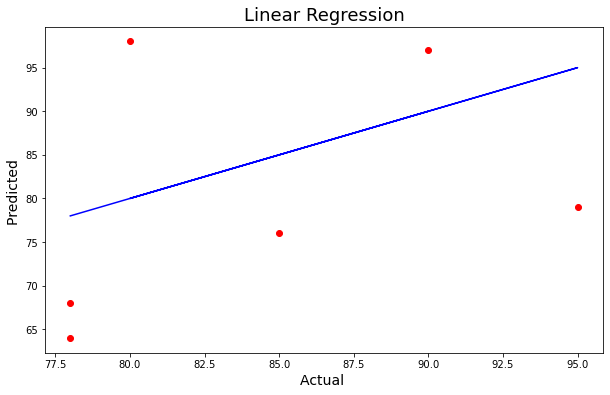

In [181]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_test,y=y_test,color='r')
plt.plot(pred_test,pred_test,color='b')
plt.xlabel('Actual ',fontsize=14)
plt.ylabel('Predicted ',fontsize=14)
plt.title("Linear Regression",fontsize=18)
plt.show()

### Regularization Model Elastic Net

In [182]:
from sklearn.linear_model import ElasticNet
# Elastic Net Model
en=ElasticNet(alpha=0.1,max_iter=1000,random_state=49,selection='random')
en.fit(x_train,y_train)

# training score
en_score_training=en.score(x_train,y_train)
en_score_training*100

85.2334794057927

In [183]:
pred_en=en.predict(x_test) # predict test

en_cv_score=cross_val_score(dtr,x,y,cv=4)
en_cv_mean=en_cv_score.mean()
en_cv_mean

-0.886839494173405

In [184]:
en.coef_

array([ 3.99712708, -2.37002657, -1.24077875, -2.348478  , -1.801704  ,
       -1.37292682])

# KNeighbors Regressor

In [185]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()

#training knr model
knr.fit(x_train,y_train)
knr_score=knr.score(x_train,y_train)

#predict knr
pred_train=knr.predict(x_train)
pred_test=knr.predict(x_test)

#result knr
print("Training Accuracy r2_score ",r2_score(y_train,pred_train),"Testing Accuracy R2_score ",r2_score(y_test,pred_test))
print("Training Mean_squared_Error ",mean_squared_error(y_train,pred_train),"Testing Mean_squared_error ",mean_squared_error(y_test,pred_test))
print("Training Absolute_Error ",mean_absolute_error(y_train,pred_train),"Testing Absolute Error",mean_absolute_error(y_test,pred_test))

Training Accuracy r2_score  0.6854853796057518 Testing Accuracy R2_score  0.5888989637305702
Training Mean_squared_Error  27.20521739130436 Testing Mean_squared_error  70.52666666666663
Training Absolute_Error  4.269565217391305 Testing Absolute Error 7.833333333333331


### Cross Validation with KNeighbors Regressor

In [186]:
from sklearn.model_selection import cross_val_score

#training accuracy.
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

for i in range(2,10):
    knr_cv_score=cross_val_score(knr,x,y,cv=i)
    cv_mean=knr_cv_score.mean()

    print(f"At CROSS_FOLD {i}, The Cross_Val_Mean {cv_mean} ,Training Score is {train_accuracy}, Testing Score{test_accuracy}")

At CROSS_FOLD 2, The Cross_Val_Mean 0.35203365006196435 ,Training Score is 0.6854853796057518, Testing Score0.5888989637305702
At CROSS_FOLD 3, The Cross_Val_Mean 0.3303236163041234 ,Training Score is 0.6854853796057518, Testing Score0.5888989637305702
At CROSS_FOLD 4, The Cross_Val_Mean 0.5104423214636994 ,Training Score is 0.6854853796057518, Testing Score0.5888989637305702
At CROSS_FOLD 5, The Cross_Val_Mean 0.019513251088930494 ,Training Score is 0.6854853796057518, Testing Score0.5888989637305702
At CROSS_FOLD 6, The Cross_Val_Mean 0.32407772731468193 ,Training Score is 0.6854853796057518, Testing Score0.5888989637305702
At CROSS_FOLD 7, The Cross_Val_Mean 0.13961647795161683 ,Training Score is 0.6854853796057518, Testing Score0.5888989637305702
At CROSS_FOLD 8, The Cross_Val_Mean 0.1111780775956446 ,Training Score is 0.6854853796057518, Testing Score0.5888989637305702
At CROSS_FOLD 9, The Cross_Val_Mean -14.24707993310404 ,Training Score is 0.6854853796057518, Testing Score0.5888

At CROSS_FOLD 4, The Cross_Val_Mean 0.5104423214636994 is close to Testing Score 0.5888989637305702

In [187]:
# As this Cross Fold point 4 Cross_Val_Score is near to training score.

# pred training for k-Neighbors
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

#cross val with k-Neighbors
knr_cv_score=cross_val_score(knr,x,y,cv=4) 
knr_mean=knr_cv_score.mean() #mean value

print("Cv_score of Model is ",knr_mean," The Training Score is ", train_accuracy," Testing Score Stands " ,test_accuracy)

Cv_score of Model is  0.5104423214636994  The Training Score is  0.6854853796057518  Testing Score Stands  0.5888989637305702


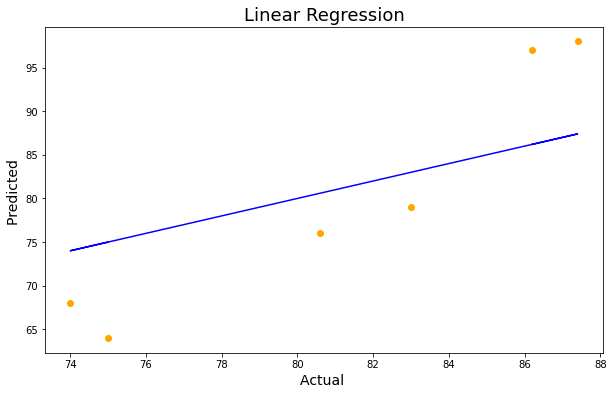

In [188]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_test,y=y_test,color='orange')
plt.plot(pred_test,pred_test,color='blue')
plt.xlabel('Actual ',fontsize=14)
plt.ylabel('Predicted ',fontsize=14)
plt.title("Linear Regression",fontsize=18)
plt.show()

### Regularization

### Regularization Model Elastic Net Works the best

In [189]:
from sklearn.linear_model import ElasticNet
# Elastic Net Model
en=ElasticNet(alpha=0.1,max_iter=1000,random_state=49,selection='random')
en.fit(x_train,y_train)

# training score
en_score_training=en.score(x_train,y_train)
en_score_training*100

85.2334794057927

In [190]:
pred_en=en.predict(x_test) # predict test

en_cv_score=cross_val_score(knr,x,y,cv=4)
en_cv_mean=en_cv_score.mean()
en_cv_mean

0.5104423214636994

In [191]:
en.coef_

array([ 3.99712708, -2.37002657, -1.24077875, -2.348478  , -1.801704  ,
       -1.37292682])

# Support Vector Regressor

In [192]:
from sklearn.svm import SVR
svr=SVR()

#training SVR
svr.fit(x_train,y_train)
svr_score=svr.score(x_train,y_train)

#predict SVR
pred_train = svr.predict(x_train)
pred_test  = svr.predict(x_test)

#result SVR
print("Training Accuracy r2_score ",r2_score(y_train,pred_train),"Testing Accuracy R2_score ",r2_score(y_test,pred_test))
print("Training Mean_squared_Error ",mean_squared_error(y_train,pred_train),"Testing Mean_squared_error ",mean_squared_error(y_test,pred_test))
print("Training Absolute_Error ",mean_absolute_error(y_train,pred_train),"Testing Absolute Error",mean_absolute_error(y_test,pred_test))

Training Accuracy r2_score  0.29325274221112185 Testing Accuracy R2_score  0.17280808631548628
Training Mean_squared_Error  61.13296979565876 Testing Mean_squared_error  141.9093683032099
Training Absolute_Error  6.123141674266335 Testing Absolute Error 10.641024938601696


### Cross_Validation with Support Vector Machine

In [193]:
from sklearn.model_selection import cross_val_score

#training accuracy.
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

for i in range(2,10):
    svr_cv_score=cross_val_score(svr,x,y,cv=i)
    cv_mean=svr_cv_score.mean()

    print(f"At CROSS_FOLD{i}, Cross_Val_Score{cv_mean} ,Training Score is {train_accuracy},Testing Score {test_accuracy} ")

At CROSS_FOLD2, Cross_Val_Score-0.12917368190315148 ,Training Score is 0.29325274221112185,Testing Score 0.17280808631548628 
At CROSS_FOLD3, Cross_Val_Score-0.19179648618052084 ,Training Score is 0.29325274221112185,Testing Score 0.17280808631548628 
At CROSS_FOLD4, Cross_Val_Score-0.04711987868633599 ,Training Score is 0.29325274221112185,Testing Score 0.17280808631548628 
At CROSS_FOLD5, Cross_Val_Score-0.24236534319875838 ,Training Score is 0.29325274221112185,Testing Score 0.17280808631548628 
At CROSS_FOLD6, Cross_Val_Score-0.11105541538099258 ,Training Score is 0.29325274221112185,Testing Score 0.17280808631548628 
At CROSS_FOLD7, Cross_Val_Score-0.23154061682479896 ,Training Score is 0.29325274221112185,Testing Score 0.17280808631548628 
At CROSS_FOLD8, Cross_Val_Score-0.4530335042081488 ,Training Score is 0.29325274221112185,Testing Score 0.17280808631548628 
At CROSS_FOLD9, Cross_Val_Score-22.95902464776355 ,Training Score is 0.29325274221112185,Testing Score 0.17280808631548

In [194]:
# As this Cross Fold point 4 Cross_Val_Score is near to training score.

# pred training for Support vector
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

#cross val with Support Vector
svr_cv_score=cross_val_score(svr,x,y,cv=4) 
svr_mean=svr_cv_score.mean() # cross val mean

print("Cv_score of Model is ",svr_mean," The Training Score is ",train_accuracy," Testing Score Stands " ,test_accuracy)

Cv_score of Model is  -0.04711987868633599  The Training Score is  0.29325274221112185  Testing Score Stands  0.17280808631548628


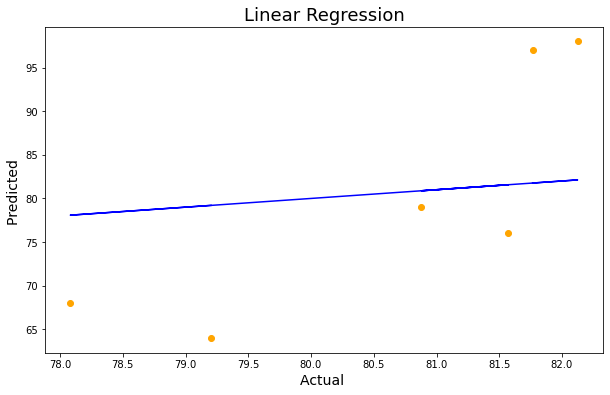

In [195]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_test,y=y_test,color='orange')
plt.plot(pred_test,pred_test,color='blue')
plt.xlabel('Actual ',fontsize=14)
plt.ylabel('Predicted ',fontsize=14)
plt.title("Linear Regression",fontsize=18)
plt.show()

## Regularization Models

In [196]:
from sklearn.linear_model import ElasticNet
# Elastic Net Model
en=ElasticNet(alpha=0.1,max_iter=1000,random_state=49,selection='random')
en.fit(x_train,y_train)

# training score
en_score_training=en.score(x_train,y_train)
en_score_training*100

85.2334794057927

In [197]:
pred_en=en.predict(x_test) # predict test

en_cv_score=cross_val_score(svr,x,y,cv=4)
en_cv_mean=en_cv_score.mean()
en_cv_mean

-0.04711987868633599

In [198]:
en.coef_

array([ 3.99712708, -2.37002657, -1.24077875, -2.348478  , -1.801704  ,
       -1.37292682])

# SGD Regressor

In [199]:
from sklearn.linear_model import SGDRegressor
sgd=SGDRegressor()

#training SGD
sgd.fit(x_train,y_train)
sgd_score=sgd.score(x_train,y_train)

#predict
pred_train=sgd.predict(x_train)
pred_test=sgd.predict(x_test)

#result
print("Training Accuracy r2_score ",r2_score(y_train,pred_train),"Testing Accuracy R2_score ",r2_score(y_test,pred_test))
print("Training Mean_squared_Error ",mean_squared_error(y_train,pred_train),"Testing Mean_squared_error ",mean_squared_error(y_test,pred_test))
print("Training Absolute_Error ",mean_absolute_error(y_train,pred_train),"Testing Absolute Error",mean_absolute_error(y_test,pred_test))

Training Accuracy r2_score  0.8531103244600706 Testing Accuracy R2_score  0.8496922127395636
Training Mean_squared_Error  12.705818097081446 Testing Mean_squared_error  25.78613594779041
Training Absolute_Error  2.8337313062065146 Testing Absolute Error 4.594214633261596


### Cross_Validation with SGD Regressor

In [200]:
from sklearn.model_selection import cross_val_score

#training accuracy.
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

for i in range(2,10):
    sgd_cv_score=cross_val_score(sgd,x,y,cv=i)
    cv_mean=sgd_cv_score.mean()

    print(f"At CROSS_FOLD{i}, The Cross_Val_Score {cv_mean} ,Training Score is {train_accuracy},Testing Score{test_accuracy}")

At CROSS_FOLD2, The Cross_Val_Score 0.5066582145840866 ,Training Score is 0.8531103244600706,Testing Score0.8496922127395636
At CROSS_FOLD3, The Cross_Val_Score 0.18585783030391742 ,Training Score is 0.8531103244600706,Testing Score0.8496922127395636
At CROSS_FOLD4, The Cross_Val_Score 0.6786582807060763 ,Training Score is 0.8531103244600706,Testing Score0.8496922127395636
At CROSS_FOLD5, The Cross_Val_Score 0.16391677140747538 ,Training Score is 0.8531103244600706,Testing Score0.8496922127395636
At CROSS_FOLD6, The Cross_Val_Score 0.1368526488057362 ,Training Score is 0.8531103244600706,Testing Score0.8496922127395636
At CROSS_FOLD7, The Cross_Val_Score 0.05153611589856428 ,Training Score is 0.8531103244600706,Testing Score0.8496922127395636
At CROSS_FOLD8, The Cross_Val_Score 0.28647598576111144 ,Training Score is 0.8531103244600706,Testing Score0.8496922127395636
At CROSS_FOLD9, The Cross_Val_Score -4.126720485130513 ,Training Score is 0.8531103244600706,Testing Score0.8496922127395

t CROSS_FOLD4, The Cross_Val_Score 0.6797974990204185 ,Training Score is 0.8532239359892355,Testing Score0.849941789265474

In [201]:
# As this Cross Fold 4 Cross_Val_Score is near to training score.

# pred training for SGD Regressor
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

#cross val with SGD Regressor
sgd_cv_score=cross_val_score(sgd,x,y,cv=4) 
sgd_mean=sgd_cv_score.mean() #mean value

print("Cv_score of Model is ",sgd_mean," The Training Score is", train_accuracy,"Testing Score Stands " ,test_accuracy)

Cv_score of Model is  0.6781658068617  The Training Score is 0.8531103244600706 Testing Score Stands  0.8496922127395636


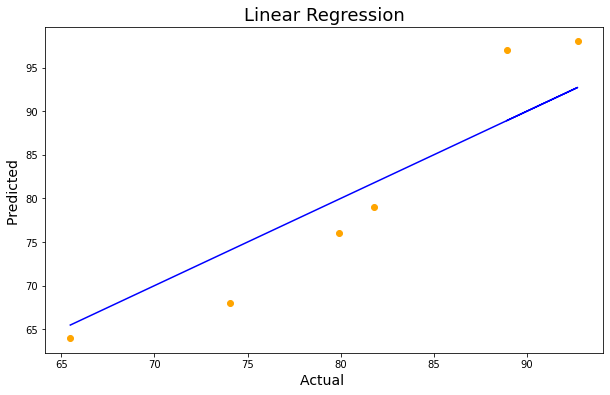

In [202]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_test,y=y_test,color='orange')
plt.plot(pred_test,pred_test,color='blue')
plt.xlabel('Actual ',fontsize=14)
plt.ylabel('Predicted ',fontsize=14)
plt.title("Linear Regression",fontsize=18)
plt.show()

## Regularization Model

In [203]:
from sklearn.linear_model import ElasticNet
# Elastic Net Model
en=ElasticNet(alpha=0.1,max_iter=1000,random_state=49,selection='random')
en.fit(x_train,y_train)

# training score
en_score_training=en.score(x_train,y_train)
en_score_training*100

85.2334794057927

In [204]:
pred_en=en.predict(x_test) # predict test

en_cv_score=cross_val_score(sgd,x,y,cv=4)
en_cv_mean=en_cv_score.mean()
en_cv_mean

0.6776960419814303

In [205]:
en.coef_

array([ 3.99712708, -2.37002657, -1.24077875, -2.348478  , -1.801704  ,
       -1.37292682])

# Ensemble Techniques (Bagging)

## Extra Trees

In [206]:
from sklearn.ensemble import ExtraTreesRegressor
etr=ExtraTreesRegressor()

#training score
etr.fit(x_train,y_train)
etr_score=etr.score(x_train,y_train)

#predict
pred_train=etr.predict(x_train)
pred_test=etr.predict(x_test)

#result
print("Training Accuracy r2_score ",r2_score(y_train,pred_train),"Testing Accuracy R2_score ",r2_score(y_test,pred_test))
print("Training Mean_squared_Error ",mean_squared_error(y_train,pred_train),"Testing Mean_squared_error ",mean_squared_error(y_test,pred_test))
print("Training Absolute_Error ",mean_absolute_error(y_train,pred_train),"Testing Absolute Error",mean_absolute_error(y_test,pred_test))

Training Accuracy r2_score  1.0 Testing Accuracy R2_score  0.6727583873056993
Training Mean_squared_Error  0.0 Testing Mean_squared_error  56.14011666666671
Training Absolute_Error  0.0 Testing Absolute Error 7.288333333333337


## Cross_Validation with Extra Trees Regressor

In [207]:
from sklearn.model_selection import cross_val_score

#training accuracy.
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

for i in range(2,10):
    etr_cv_score=cross_val_score(etr,x,y,cv=i)
    cv_mean=etr_cv_score.mean()

    print(f"At CROSS_FOLD{i}, The Cross_Val_Score {cv_mean} ,Training Score is {train_accuracy},Testing Score{test_accuracy}")

At CROSS_FOLD2, The Cross_Val_Score 0.19590967633955836 ,Training Score is 1.0,Testing Score0.6727583873056993
At CROSS_FOLD3, The Cross_Val_Score 0.07177200886467612 ,Training Score is 1.0,Testing Score0.6727583873056993
At CROSS_FOLD4, The Cross_Val_Score 0.14453793382066207 ,Training Score is 1.0,Testing Score0.6727583873056993
At CROSS_FOLD5, The Cross_Val_Score -0.14887176872219843 ,Training Score is 1.0,Testing Score0.6727583873056993
At CROSS_FOLD6, The Cross_Val_Score -0.011944863662184835 ,Training Score is 1.0,Testing Score0.6727583873056993
At CROSS_FOLD7, The Cross_Val_Score -0.35239332330543427 ,Training Score is 1.0,Testing Score0.6727583873056993
At CROSS_FOLD8, The Cross_Val_Score -0.21363610146687115 ,Training Score is 1.0,Testing Score0.6727583873056993
At CROSS_FOLD9, The Cross_Val_Score -10.91887828040997 ,Training Score is 1.0,Testing Score0.6727583873056993


- At CROSS_FOLD2, The Cross_Val_Score 0.21565406997839343 ,Training Score is 1.0,Testing Score0.6811154468911915

In [208]:
# As this Cross Fold 2 Cross_Val_Score is near to training score.

# pred training for Extra Trees
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

#cross val with Extra Trees
etr_cv_score=cross_val_score(etr,x,y,cv=2) 
etr_mean=etr_cv_score.mean() #mean value

print("Cv_score of Model is ",etr_mean," The Training Score is", train_accuracy,"Testing Score Stands " ,test_accuracy)

Cv_score of Model is  0.16067459811117835  The Training Score is 1.0 Testing Score Stands  0.6727583873056993


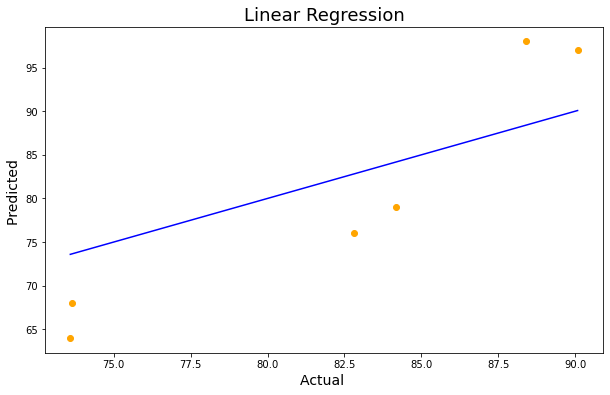

In [209]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_test,y=y_test,color='orange')
plt.plot(pred_test,pred_test,color='blue')
plt.xlabel('Actual ',fontsize=14)
plt.ylabel('Predicted ',fontsize=14)
plt.title("Linear Regression",fontsize=18)
plt.show()

## Regularization

In [210]:
from sklearn.linear_model import ElasticNet
# Elastic Net Model
en=ElasticNet(alpha=0.1,max_iter=1000,random_state=49,selection='random')
en.fit(x_train,y_train)

# training score
en_score_training=en.score(x_train,y_train)
en_score_training*100

85.2334794057927

In [211]:
pred_en=en.predict(x_test) # predict test

en_cv_score=cross_val_score(en,x,y,cv=4)
en_cv_mean=en_cv_score.mean()
en_cv_mean

0.681957893117971

In [212]:
en.coef_

array([ 3.99712708, -2.37002657, -1.24077875, -2.348478  , -1.801704  ,
       -1.37292682])

## Random Forest Regressor

In [213]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()

#training
rfr.fit(x_train,y_train)
rfr_score= rfr.score(x_train,y_train)

#predict
pred_train = rfr.predict(x_train)
pred_test = rfr.predict(x_test)

#result
print("Training Accuracy r2_score ",r2_score(y_train,pred_train),"Testing Accuracy R2_score ",r2_score(y_test,pred_test))
print("Training Mean_squared_Error ",mean_squared_error(y_train,pred_train),"Testing Mean_squared_error ",mean_squared_error(y_test,pred_test))
print("Training Absolute_Error ",mean_absolute_error(y_train,pred_train),"Testing Absolute Error",mean_absolute_error(y_test,pred_test))

Training Accuracy r2_score  0.8850351348398094 Testing Accuracy R2_score  0.5823993199481863
Training Mean_squared_Error  9.94435217391304 Testing Mean_squared_error  71.64171666666671
Training Absolute_Error  2.342173913043478 Testing Absolute Error 8.11166666666667


In [214]:
from sklearn.model_selection import cross_val_score

#training accuracy.
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

for i in range(2,10):
    rfr_cv_score=cross_val_score(rfr,x,y,cv=i)
    cv_mean=rfr_cv_score.mean()

    print(f"At CROSS_FOLD{i}, The Cross_Val_Score {cv_mean} ,Training Score is {train_accuracy},Testing Score{test_accuracy}")

At CROSS_FOLD2, The Cross_Val_Score -0.050980313920579 ,Training Score is 0.8850351348398094,Testing Score0.5823993199481863
At CROSS_FOLD3, The Cross_Val_Score -0.20648844994182688 ,Training Score is 0.8850351348398094,Testing Score0.5823993199481863
At CROSS_FOLD4, The Cross_Val_Score -0.10050145161732787 ,Training Score is 0.8850351348398094,Testing Score0.5823993199481863
At CROSS_FOLD5, The Cross_Val_Score -0.27754148589975475 ,Training Score is 0.8850351348398094,Testing Score0.5823993199481863
At CROSS_FOLD6, The Cross_Val_Score -0.04251568393771882 ,Training Score is 0.8850351348398094,Testing Score0.5823993199481863
At CROSS_FOLD7, The Cross_Val_Score -0.5627299847844341 ,Training Score is 0.8850351348398094,Testing Score0.5823993199481863
At CROSS_FOLD8, The Cross_Val_Score -0.2647245621031223 ,Training Score is 0.8850351348398094,Testing Score0.5823993199481863
At CROSS_FOLD9, The Cross_Val_Score -13.806319341287892 ,Training Score is 0.8850351348398094,Testing Score0.582399

At CROSS_FOLD2, The Cross_Val_Score 0.012015630718006265 ,Training Score is 0.8891425936448271,Testing Score0.605797279792746

In [215]:
# As this Cross Fold 2 Cross_Val_Score is near to training score.

# pred training for Random Forest
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

#cross val with Random Forest
rfr_cv_score=cross_val_score(rfr,x,y,cv=4) 
rfr_mean=rfr_cv_score.mean()

print("Cv_score of Model is ",rfr_mean," The Training Score is", train_accuracy,"Testing Score Stands " ,test_accuracy)

Cv_score of Model is  -0.0918863408596787  The Training Score is 0.8850351348398094 Testing Score Stands  0.5823993199481863


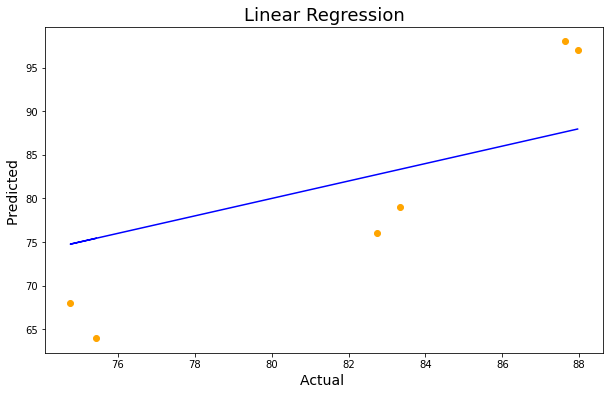

In [216]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_test,y=y_test,color='orange')
plt.plot(pred_test,pred_test,color='blue')
plt.xlabel('Actual ',fontsize=14)
plt.ylabel('Predicted ',fontsize=14)
plt.title("Linear Regression",fontsize=18)
plt.show()

## Regularization

### Regularization(Elastic_Net)

In [217]:
from sklearn.linear_model import ElasticNet
# Elastic Net Model
en=ElasticNet(alpha=0.1,max_iter=1000,random_state=49,selection='random')
en.fit(x_train,y_train)

# training score
en_score_training=en.score(x_train,y_train)
en_score_training*100

85.2334794057927

In [218]:
pred_en=en.predict(x_test) # predict test

en_cv_score=cross_val_score(en,x,y,cv=4)
en_cv_mean=en_cv_score.mean()
en_cv_mean

0.681957893117971

In [219]:
en.coef_

array([ 3.99712708, -2.37002657, -1.24077875, -2.348478  , -1.801704  ,
       -1.37292682])

# Ensemble Techniques (Boosting )

## Ada Boost

In [220]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()

#training_ada_Boost
ada.fit(x_train,y_train)
ada_score= ada.score(x_train,y_train)

#predict_ada_Boost
pred_train = ada.predict(x_train)
pred_test = ada.predict(x_test)

#result
print("Training Accuracy r2_score ",r2_score(y_train,pred_train),"Testing Accuracy R2_score ",r2_score(y_test,pred_test))
print("Training Mean_squared_Error ",mean_squared_error(y_train,pred_train),"Testing Mean_squared_error ",mean_squared_error(y_test,pred_test))
print("Training Absolute_Error ",mean_absolute_error(y_train,pred_train),"Testing Absolute Error",mean_absolute_error(y_test,pred_test))

Training Accuracy r2_score  0.9614712179273983 Testing Accuracy R2_score  0.5159488341968912
Training Mean_squared_Error  3.3327032326618276 Testing Mean_squared_error  83.04166666666667
Training Absolute_Error  1.3896480331262946 Testing Absolute Error 8.583333333333334


### Cross Validation With ADA Boosting Model

In [221]:
from sklearn.model_selection import cross_val_score

#training accuracy.
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

for i in range(2,10):
    ada_cv_score=cross_val_score(ada,x,y,cv=i)
    cv_mean=ada_cv_score.mean()

    print(f"At CROSS_FOLD{i}, The Cross_Val_Score {cv_mean} ,Training Score is {train_accuracy},Testing Score{test_accuracy}")

At CROSS_FOLD2, The Cross_Val_Score 0.07983041304877542 ,Training Score is 0.9614712179273983,Testing Score0.5159488341968912
At CROSS_FOLD3, The Cross_Val_Score -0.2240043798367504 ,Training Score is 0.9614712179273983,Testing Score0.5159488341968912
At CROSS_FOLD4, The Cross_Val_Score -0.07923541951318633 ,Training Score is 0.9614712179273983,Testing Score0.5159488341968912
At CROSS_FOLD5, The Cross_Val_Score -0.4723236568169775 ,Training Score is 0.9614712179273983,Testing Score0.5159488341968912
At CROSS_FOLD6, The Cross_Val_Score -0.3057099841769637 ,Training Score is 0.9614712179273983,Testing Score0.5159488341968912
At CROSS_FOLD7, The Cross_Val_Score -0.7871700083712302 ,Training Score is 0.9614712179273983,Testing Score0.5159488341968912
At CROSS_FOLD8, The Cross_Val_Score -0.6344856954285087 ,Training Score is 0.9614712179273983,Testing Score0.5159488341968912
At CROSS_FOLD9, The Cross_Val_Score -11.31408720235968 ,Training Score is 0.9614712179273983,Testing Score0.515948834

At CROSS_FOLD4, The Cross_Val_Score -0.027196726494190915 is close to Testing Score 0.5688902606865285

In [222]:
# As this Cross Fold 4 Cross_Val_Score is near to training score.

# pred training for Ada Boost
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

#cross val with Ada Boost
ada_cv_score=cross_val_score(ada,x,y,cv=4) 
ada_mean=ada_cv_score.mean() # mean value

print("Cv_score of Model is ",ada_mean," The Training Score is", train_accuracy,"Testing Score Stands " ,test_accuracy)

Cv_score of Model is  -0.02805742717315335  The Training Score is 0.9614712179273983 Testing Score Stands  0.5159488341968912


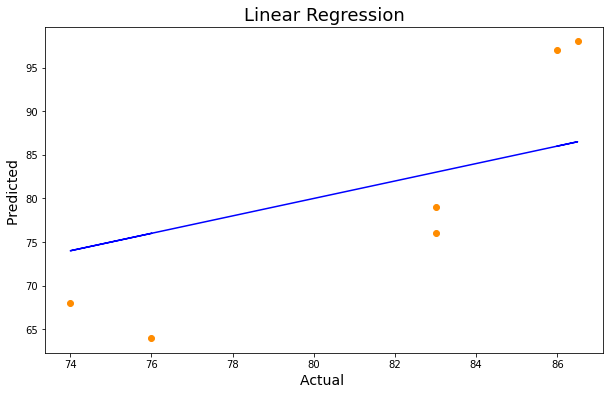

In [223]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_test,y=y_test,color='darkorange')
plt.plot(pred_test,pred_test,color='blue')
plt.xlabel('Actual ',fontsize=14)
plt.ylabel('Predicted ',fontsize=14)
plt.title("Linear Regression",fontsize=18)
plt.show()

## Regularization

In [224]:
from sklearn.linear_model import ElasticNet
# Elastic Net Model
en=ElasticNet(alpha=0.1,max_iter=1000,random_state=49,selection='random')
en.fit(x_train,y_train)

# training score
en_score_training=en.score(x_train,y_train)
en_score_training*100

85.2334794057927

In [225]:
pred_en=en.predict(x_test) # predict test

en_cv_score=cross_val_score(en,x,y,cv=4)
en_cv_mean=en_cv_score.mean()
en_cv_mean

0.681957893117971

In [226]:
en.coef_

array([ 3.99712708, -2.37002657, -1.24077875, -2.348478  , -1.801704  ,
       -1.37292682])

## Gradient Boost

In [227]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()

#training_Gradient_Boost
gbr.fit(x_train,y_train)
gbr_score= gbr.score(x_train,y_train)

#predict_gbr
pred_train = gbr.predict(x_train)
pred_test = gbr.predict(x_test)

#result_gbr
print("Training Accuracy r2_score ",r2_score(y_train,pred_train),"Testing Accuracy R2_score ",r2_score(y_test,pred_test))
print("Training Mean_squared_Error ",mean_squared_error(y_train,pred_train),"Testing Mean_squared_error ",mean_squared_error(y_test,pred_test))
print("Training Absolute_Error ",mean_absolute_error(y_train,pred_train),"Testing Absolute Error",mean_absolute_error(y_test,pred_test))

Training Accuracy r2_score  0.9999847814786973 Testing Accuracy R2_score  0.5543803285005356
Training Mean_squared_Error  0.0013163877084520603 Testing Mean_squared_error  76.44853031057477
Training Absolute_Error  0.03299916194783523 Testing Absolute Error 8.523054077823694


### Cross Validation with Gradient Boost

In [228]:
from sklearn.model_selection import cross_val_score

# testing
train_accuracy=r2_score(y_train,pred_train)
test_accuracy =r2_score(y_test,pred_test)

#cross validation
for i in range(2,10):
    gbr_cv_score=cross_val_score(gbr,x,y,cv=i)
    cv_mean=gbr_cv_score.mean()
    
    print(f"At CROSS_FOLD{i}, Cross_Val_Score is {cv_mean} ,Training Score is {train_accuracy},Testing Score{test_accuracy}")

At CROSS_FOLD2, Cross_Val_Score is -0.5322784795189924 ,Training Score is 0.9999847814786973,Testing Score0.5543803285005356
At CROSS_FOLD3, Cross_Val_Score is -0.2880505233325935 ,Training Score is 0.9999847814786973,Testing Score0.5543803285005356
At CROSS_FOLD4, Cross_Val_Score is -0.16363217673863567 ,Training Score is 0.9999847814786973,Testing Score0.5543803285005356
At CROSS_FOLD5, Cross_Val_Score is -0.1327703245074571 ,Training Score is 0.9999847814786973,Testing Score0.5543803285005356
At CROSS_FOLD6, Cross_Val_Score is -0.14813138440141063 ,Training Score is 0.9999847814786973,Testing Score0.5543803285005356
At CROSS_FOLD7, Cross_Val_Score is -1.0784757481413316 ,Training Score is 0.9999847814786973,Testing Score0.5543803285005356
At CROSS_FOLD8, Cross_Val_Score is -0.9116128243885651 ,Training Score is 0.9999847814786973,Testing Score0.5543803285005356
At CROSS_FOLD9, Cross_Val_Score is -11.131791597599994 ,Training Score is 0.9999847814786973,Testing Score0.554380328500535

- At CROSS_FOLD5, Cross_Val_Score is -0.08208678891430884 ,Training Score is 0.9999847814786973,Testing Score0.4563724621101677

In [229]:
# As this Cross Fold 4 Cross_Val_Score is near to training score.

# pred training for Gradient Boost
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

#cross val with Gradient Boost
gbr_cv_score=cross_val_score(gbr,x,y,cv=5) 
gbr_mean=gbr_cv_score.mean() # mean value

print("Cv_score of Model is ",gbr_mean," The Training Score is", train_accuracy,"Testing Score Stands " ,test_accuracy)

Cv_score of Model is  -0.2674385139622665  The Training Score is 0.9999847814786973 Testing Score Stands  0.5543803285005356


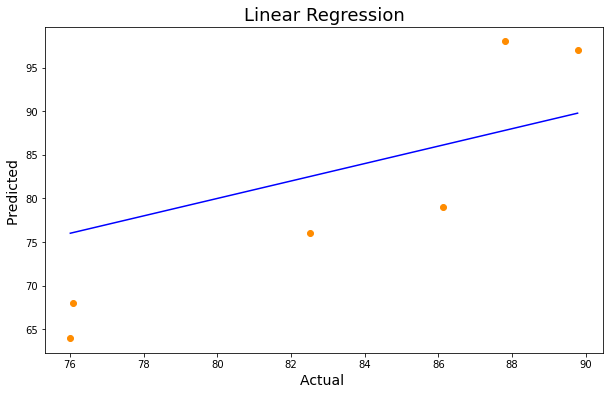

In [230]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_test,y=y_test,color='darkorange')
plt.plot(pred_test,pred_test,color='blue')
plt.xlabel('Actual ',fontsize=14)
plt.ylabel('Predicted ',fontsize=14)
plt.title("Linear Regression",fontsize=18)
plt.show()

## Regularization

In [231]:
from sklearn.linear_model import ElasticNet
# Elastic Net Model
en=ElasticNet(alpha=0.1,max_iter=1000,random_state=49,selection='random')
en.fit(x_train,y_train)

# training score
en_score_training=en.score(x_train,y_train)
en_score_training*100

85.2334794057927

In [232]:
pred_en=en.predict(x_test) # predict test

en_cv_score=cross_val_score(en,x,y,cv=4)
en_cv_mean=en_cv_score.mean()
en_cv_mean

0.681957893117971

In [233]:
en.coef_

array([ 3.99712708, -2.37002657, -1.24077875, -2.348478  , -1.801704  ,
       -1.37292682])

# Neural Network(MLPRegressor)

In [234]:
from sklearn.neural_network import MLPRegressor
mlp= MLPRegressor()

#training
#training_mlp
mlp.fit(x_train,y_train)
mlp_score= mlp.score(x_train,y_train)

#predict_mlp
pred_train = mlp.predict(x_train)
pred_test = mlp.predict(x_test)

#result_mlp
print("Training Accuracy r2_score ",r2_score(y_train,pred_train),"Testing Accuracy R2_score ",r2_score(y_test,pred_test))
print("Training Mean_squared_Error ",mean_squared_error(y_train,pred_train),"Testing Mean_squared_error ",mean_squared_error(y_test,pred_test))
print("Training Absolute_Error ",mean_absolute_error(y_train,pred_train),"Testing Absolute Error",mean_absolute_error(y_test,pred_test))

Training Accuracy r2_score  -54.182930832280334 Testing Accuracy R2_score  -31.214501104300474
Training Mean_squared_Error  4773.271359212634 Testing Mean_squared_error  5526.576633893325
Training Absolute_Error  68.40995687875649 Testing Absolute Error 73.35365815335133


### Cross Validation with MLP Regressor

In [235]:
from sklearn.model_selection import cross_val_score

# testing
train_accuracy=r2_score(y_train,pred_train)
test_accuracy =r2_score(y_test,pred_test)

#cross validation
for i in range(2,10):
    mlp_cv_score=cross_val_score(mlp,x,y,cv=i)
    cv_mean=mlp_cv_score.mean()
    
    print(f"At CROSS_FOLD{i}, Cross_Val_Score is {cv_mean} ,Training Score is {train_accuracy},Testing Score{test_accuracy}")

At CROSS_FOLD2, Cross_Val_Score is -60.76348695928603 ,Training Score is -54.182930832280334,Testing Score-31.214501104300474
At CROSS_FOLD3, Cross_Val_Score is -83.05025621117764 ,Training Score is -54.182930832280334,Testing Score-31.214501104300474
At CROSS_FOLD4, Cross_Val_Score is -70.25036685155878 ,Training Score is -54.182930832280334,Testing Score-31.214501104300474
At CROSS_FOLD5, Cross_Val_Score is -131.114524854249 ,Training Score is -54.182930832280334,Testing Score-31.214501104300474
At CROSS_FOLD6, Cross_Val_Score is -114.09258058781423 ,Training Score is -54.182930832280334,Testing Score-31.214501104300474
At CROSS_FOLD7, Cross_Val_Score is -156.18929623117103 ,Training Score is -54.182930832280334,Testing Score-31.214501104300474
At CROSS_FOLD8, Cross_Val_Score is -137.1109937050872 ,Training Score is -54.182930832280334,Testing Score-31.214501104300474
At CROSS_FOLD9, Cross_Val_Score is -730.7276518067602 ,Training Score is -54.182930832280334,Testing Score-31.2145011

- At CROSS_FOLD2, Cross_Val_Score is near toTesting Score

In [236]:
# As this Cross Fold 2 Cross_Val_Score is near to training score.

# pred training for MLP Regressor
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

#cross val with MLP Regressor
mlp_cv_score=cross_val_score(mlp,x,y,cv=2) 
mlp_mean=mlp_cv_score.mean() # mean value

print("Cv_score of Model is ",mlp_mean," The Training Score is", train_accuracy,"Testing Score Stands " ,test_accuracy)

Cv_score of Model is  -61.87239565926359  The Training Score is -54.182930832280334 Testing Score Stands  -31.214501104300474


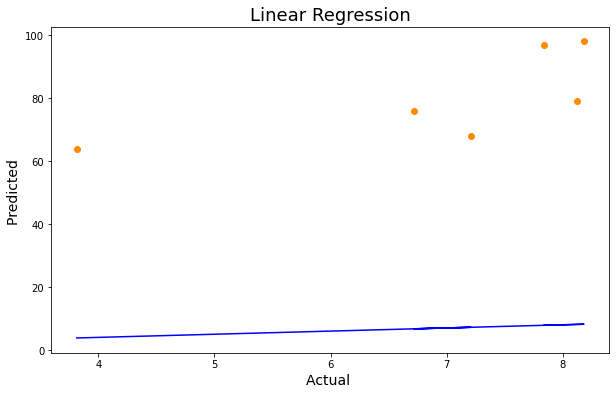

In [237]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_test,y=y_test,color='darkorange')
plt.plot(pred_test,pred_test,color='blue')
plt.xlabel('Actual ',fontsize=14)
plt.ylabel('Predicted ',fontsize=14)
plt.title("Linear Regression",fontsize=18)
plt.show()

## Regularization

In [238]:
from sklearn.linear_model import ElasticNet
# Elastic Net Model
en=ElasticNet()
en.fit(x_train,y_train)

# training score
en_score_training=en.score(x_train,y_train)
en_score_training*100

77.98678243172203

In [239]:
pred_en=en.predict(x_test) # predict test

en_cv_score=cross_val_score(en,x,y,cv=4)
en_cv_mean=en_cv_score.mean()
en_cv_mean

0.5850794059734361

In [240]:
en.coef_

array([ 3.33145599, -1.69604775, -0.72843465, -1.39815242, -0.87565679,
       -0.19882662])

# Working On Best Models by Hyper-Parameter

Selecting SGD Regressor and Ada due to following reasons:
------------------------------------------------------------------------------------------
1. R2 score is better for the model
2. Cv score better for the model and near to training score
3. mean_square_error and Absolute error are less on compare to other models
4. knn score was better and sgd applied under ada boost

# Model 1

In [242]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor
sgd=SGDRegressor()

parameters={'penalty':['l2','l1', 'elasticnet'],
           'validation_fraction':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
           'n_iter_no_change':[5,6,7,8,9,10,11,12,13,14,15,16,17,18],
           'alpha':[0.0001,0.001,0.01,0.1,1],
           'tol':[0.001,0.01,0.1,0.001]}

gsv=GridSearchCV(sgd,parameters)
gsv.fit(x_train,y_train)

print("Best Parameter ",gsv.best_params_,"Best Score ",gsv.best_score_)

Best Parameter  {'alpha': 0.1, 'n_iter_no_change': 13, 'penalty': 'l2', 'tol': 0.001, 'validation_fraction': 0.4} Best Score  0.5725152381843468


In [243]:
from sklearn.linear_model import SGDRegressor
sgd=SGDRegressor(alpha= 0.01, n_iter_no_change= 13, penalty= 'l2', random_state= 4, validation_fraction= 0.4,epsilon=0.7,l1_ratio=0.15,power_t=0.25)

#training model on SGD
sgd.fit(x_train,y_train)
sgd_score=sgd.score(x_train,y_train)

#predict SGD
pred_train =sgd.predict(x_train)
pred_test  =sgd.predict(x_test)

#result
print("Training Accuracy r2_score ",r2_score(y_train,pred_train)," Testing Accuracy R2_score ",r2_score(y_test,pred_test))
print("Training Mean_squared_Error ",mean_squared_error(y_train,pred_train)," Testing Mean_squared_error ",mean_squared_error(y_test,pred_test))
print("Training Mean_Absolute_Error ",mean_absolute_error(y_train,pred_train)," Testing Absolute Error ",mean_absolute_error(y_test,pred_test))

Training Accuracy r2_score  0.8536605235032586  Testing Accuracy R2_score  0.8503921604917413
Training Mean_squared_Error  12.658226399882597  Testing Mean_squared_error  25.666056022305728
Training Mean_Absolute_Error  2.8220708856872023  Testing Absolute Error  4.694397889472296


# Cross-Validation on SGD-Model

In [244]:
from sklearn.model_selection import cross_val_score

# testing
train_accuracy=r2_score(y_train,pred_train)
test_accuracy =r2_score(y_test,pred_test)

#cross validation
for i in range(2,10):
    sgd_cv_score=cross_val_score(sgd,x,y,cv=i)
    cv_mean=sgd_cv_score.mean()
    
    print(f"At CROSS_FOLD{i}, Cross_Val_Score is {cv_mean} ,Training Score is {train_accuracy},Testing Score{test_accuracy}")

At CROSS_FOLD2, Cross_Val_Score is 0.532204928980949 ,Training Score is 0.8536605235032586,Testing Score0.8503921604917413
At CROSS_FOLD3, Cross_Val_Score is 0.22922318287099883 ,Training Score is 0.8536605235032586,Testing Score0.8503921604917413
At CROSS_FOLD4, Cross_Val_Score is 0.6794357887162745 ,Training Score is 0.8536605235032586,Testing Score0.8503921604917413
At CROSS_FOLD5, Cross_Val_Score is 0.1834046146948063 ,Training Score is 0.8536605235032586,Testing Score0.8503921604917413
At CROSS_FOLD6, Cross_Val_Score is 0.18060594711346867 ,Training Score is 0.8536605235032586,Testing Score0.8503921604917413
At CROSS_FOLD7, Cross_Val_Score is 0.07349065235597288 ,Training Score is 0.8536605235032586,Testing Score0.8503921604917413
At CROSS_FOLD8, Cross_Val_Score is 0.297903308889905 ,Training Score is 0.8536605235032586,Testing Score0.8503921604917413
At CROSS_FOLD9, Cross_Val_Score is -3.8806423867051874 ,Training Score is 0.8536605235032586,Testing Score0.8503921604917413


At CROSS_FOLD 4, Cross_Val_Score is 0.68 is close to Training Score is 0.85 and Testing Score is 0.85

In [245]:
# As this Cross Fold 4 Cross_Val_Score is near to training score.

# pred training for SGD-Model
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

#cross val with SGD-Model
sgd_cv_score=cross_val_score(sgd,x,y,cv=4) 
sgd_mean=sgd_cv_score.mean() #mean value

print("Cv_score of Model is ",sgd_mean*100," The Training Score is", train_accuracy*100,"Testing Score Stands " ,test_accuracy*100)

Cv_score of Model is  67.94357887162745  The Training Score is 85.36605235032586 Testing Score Stands  85.03921604917413


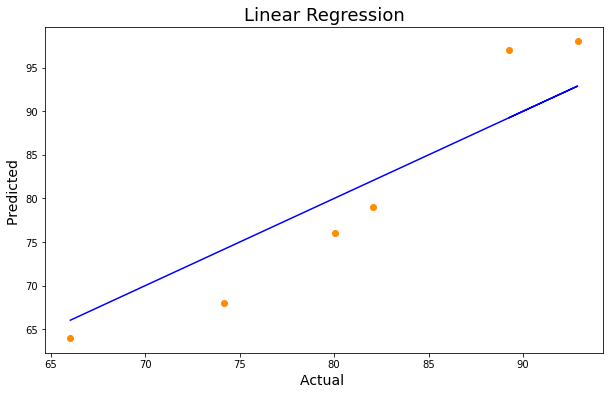

In [246]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_test,y=y_test,color='darkorange')
plt.plot(pred_test,pred_test,color='blue')
plt.xlabel('Actual ',fontsize=14)
plt.ylabel('Predicted ',fontsize=14)
plt.title("Linear Regression",fontsize=18)
plt.show()

### Regularlization on Model

In [247]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [248]:
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,100))}

ls=Lasso()
gsv=GridSearchCV(ls,parameters)
gsv.fit(x_train,y_train)

print("Best Score ",gsv.best_score_,"Best Parameter ",gsv.best_params_)

Best Score  0.564423820488795 Best Parameter  {'alpha': 0.1, 'random_state': 0}


In [249]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

parameter={'alpha':[0.0001,0.001,0.01,0.1,1],'solver':['auto','svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']}
rd=Ridge()
gsv=GridSearchCV(rd,parameter)
gsv.fit(x_train,y_train)

print("Best Score ",gsv.best_score_,"Best Parameter ",gsv.best_params_)

Best Score  0.5758697075168568 Best Parameter  {'alpha': 1, 'solver': 'sag'}


In [250]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

parameter={'alpha':[0.0001,0.001,0.01,0.1,1],'selection':['cyclic', 'random'],'random_state':list(range(0,100)),'max_iter':[1000,2000,3000,4000,5000]}
en=ElasticNet()
gsv=GridSearchCV(en,parameter)
gsv.fit(x_train,y_train)

print("Best Score ",gsv.best_score_,"Best Parameter ",gsv.best_params_) 

Best Score  0.5743036605814289 Best Parameter  {'alpha': 0.1, 'max_iter': 1000, 'random_state': 49, 'selection': 'random'}


### Ridge is working Better

In [251]:
from sklearn.linear_model import Ridge

rd=Ridge(alpha=1,solver='sag')
rd.fit(x_train,y_train)

# training score
rd_score_training=rd.score(x_train,y_train)
rd_score_training*100

85.32653195030694

In [254]:
pred_rd=rd.predict(x_test) # predict test
#cross val score
rd_cv_score=cross_val_score(rd,x,y,cv=4)
rd_cv_mean=rd_cv_score.mean()
rd_cv_mean

0.6817261056472937

### Checking Model Coef_

In [253]:
print(sgd.intercept_,"\n", sgd.coef_) # coef and intercept of the model

[80.60902797] 
 [ 4.05710386 -2.43602872 -1.30824208 -2.5899541  -1.89110663 -1.74725469]


In [255]:
rd_check=Ridge(alpha=1,solver='sag')
rd_check.fit(x_train,y_train)
rd_check.coef_

array([ 4.02496769, -2.40689778, -1.27481392, -2.4157873 , -1.86385619,
       -1.48786402])

# Model 2(Ada Boost with SGD and kNeighbors)

In [263]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()

parameters={'base_estimator':[knr,sgd],
           'n_estimators':list(range(50,70)),
            'learning_rate':[1,2,3,4,5,6,7,8,9,10],
            'loss':['linear', 'square', 'exponential'],
            'random_state':list(range(90,100)),}

gsv=GridSearchCV(ada,parameters)
gsv.fit(x_train,y_train)

print("Best Parameter ",gsv.best_params_,"Best Score ",gsv.best_score_)

Best Parameter  {'base_estimator': SGDRegressor(alpha=0.01, epsilon=0.7, n_iter_no_change=13, random_state=4,
             validation_fraction=0.4), 'learning_rate': 1, 'loss': 'linear', 'n_estimators': 50, 'random_state': 94} Best Score  0.6489815969443778


In [265]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor(base_estimator = SGDRegressor(alpha=0.01, epsilon=0.7, n_iter_no_change=13, random_state=4,
             validation_fraction=0.4),learning_rate = 1, loss= 'linear', n_estimators = 50, random_state = 94)
#Train Model on Ada-Boost
ada.fit(x_train,y_train)
ada_score=ada.fit(x_train,y_train)

#predict Ada-Boost
pred_train = ada.predict(x_train)
pred_test  = ada.predict(x_test)

#result
print("Training Accuracy r2_score ",r2_score(y_train,pred_train)," Testing Accuracy R2_score ",r2_score(y_test,pred_test))
print("Training Mean_squared_Error ",mean_squared_error(y_train,pred_train)," Testing Mean_squared_error ",mean_squared_error(y_test,pred_test))
print("Training Mean_Absolute_Error ",mean_absolute_error(y_train,pred_train)," Testing Absolute Error ",mean_absolute_error(y_test,pred_test))

Training Accuracy r2_score  0.8968922087099004  Testing Accuracy R2_score  0.8222046962731582
Training Mean_squared_Error  8.918726491214324  Testing Mean_squared_error  30.50177210602708
Training Mean_Absolute_Error  2.5514867113378825  Testing Absolute Error  5.136207714257814


In [266]:
from sklearn.model_selection import cross_val_score

# testing
train_accuracy=r2_score(y_train,pred_train)
test_accuracy =r2_score(y_test,pred_test)

#cross validation
for i in range(2,10):
    ada_cv_score=cross_val_score(ada,x,y,cv=i)
    cv_mean     =ada_cv_score.mean()
    
    print(f"At CROSS_FOLD{i}, Cross_Val_Score is {cv_mean} ,Training Score is {train_accuracy},Testing Score{test_accuracy}")

At CROSS_FOLD2, Cross_Val_Score is 0.28222098171398585 ,Training Score is 0.8968922087099004,Testing Score0.8222046962731582
At CROSS_FOLD3, Cross_Val_Score is -0.25483580539014267 ,Training Score is 0.8968922087099004,Testing Score0.8222046962731582
At CROSS_FOLD4, Cross_Val_Score is 0.6538590785671705 ,Training Score is 0.8968922087099004,Testing Score0.8222046962731582
At CROSS_FOLD5, Cross_Val_Score is 0.2660550779617864 ,Training Score is 0.8968922087099004,Testing Score0.8222046962731582
At CROSS_FOLD6, Cross_Val_Score is 0.06462735530981172 ,Training Score is 0.8968922087099004,Testing Score0.8222046962731582
At CROSS_FOLD7, Cross_Val_Score is -0.2984858734032887 ,Training Score is 0.8968922087099004,Testing Score0.8222046962731582
At CROSS_FOLD8, Cross_Val_Score is 0.36285989423575704 ,Training Score is 0.8968922087099004,Testing Score0.8222046962731582
At CROSS_FOLD9, Cross_Val_Score is -4.671505764523001 ,Training Score is 0.8968922087099004,Testing Score0.8222046962731582


In [267]:
# As this Cross Fold 4 Cross_Val_Score is near to training score.

# pred training for ada boost-Model
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

#cross val with ada boost-Model
ada_cv_score=cross_val_score(ada,x,y,cv=4) 
ada_mean=ada_cv_score.mean() #mean value

print("Cv_score of Model is ",ada_mean*100," The Training Score is", train_accuracy*100,"Testing Score Stands " ,test_accuracy*100)

Cv_score of Model is  65.38590785671705  The Training Score is 89.68922087099004 Testing Score Stands  82.22046962731582


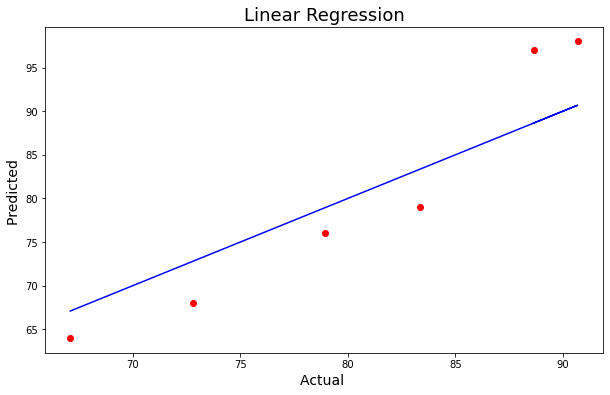

In [269]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_test,y=y_test,color='red')
plt.plot(pred_test,pred_test,color='blue')
plt.xlabel('Actual ',fontsize=14)
plt.ylabel('Predicted ',fontsize=14)
plt.title("Linear Regression",fontsize=18)
plt.show()

### Regularization

In [270]:
from sklearn.model_selection import GridSearchCV

In [271]:
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,100))}

ls=Lasso()
gsv=GridSearchCV(ls,parameters)
gsv.fit(x_train,y_train)

print("Best Score ",gsv.best_score_,"Best Parameter ",gsv.best_params_)

Best Score  0.564423820488795 Best Parameter  {'alpha': 0.1, 'random_state': 0}


In [272]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

parameter={'alpha':[0.0001,0.001,0.01,0.1,1],'solver':['auto','svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']}
rd=Ridge()
gsv=GridSearchCV(rd,parameter)
gsv.fit(x_train,y_train)

print("Best Score ",gsv.best_score_,"Best Parameter ",gsv.best_params_)

Best Score  0.5759253534488114 Best Parameter  {'alpha': 1, 'solver': 'saga'}


In [273]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

parameter={'alpha':[0.0001,0.001,0.01,0.1,1],'selection':['cyclic', 'random'],'random_state':list(range(0,100)),'max_iter':[1000,2000,3000,4000,5000]}
en=ElasticNet()
gsv=GridSearchCV(en,parameter)
gsv.fit(x_train,y_train)

print("Best Score ",gsv.best_score_,"Best Parameter ",gsv.best_params_) 

Best Score  0.5743036605814289 Best Parameter  {'alpha': 0.1, 'max_iter': 1000, 'random_state': 49, 'selection': 'random'}


In [274]:
from sklearn.linear_model import Ridge

rd=Ridge(alpha=1,solver='saga')
rd.fit(x_train,y_train)

# training score
rd_score_training=rd.score(x_train,y_train)
rd_score_training*100

85.3292165988756

In [276]:
pred_rd=rd.predict(x_test) # predict test
#cross val score
rd_cv_score=cross_val_score(sgd,x,y,cv=4)
rd_cv_mean=rd_cv_score.mean()
rd_cv_mean

0.6824343089192562

In [281]:
rd_check=Ridge(alpha=1,solver='sag')
rd_check.fit(x_train,y_train)
rd_check.coef_

array([ 4.02091964, -2.40617023, -1.2790173 , -2.41818379, -1.86552552,
       -1.49179963])

# Saving Model

In [282]:
#SGD is working at Cv_score=  67.94357887162745  The Training Score is 85.37 Testing Score Stands  85.04

In [286]:
import pickle
filename='Baseball.pkl'
pickle.dump(sgd, open(filename, 'wb')) #saved model

### Loading Back that model

In [288]:
import pickle
loaded_model =pickle.load(open('Baseball.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

85.03921604917413


In [290]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_test[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5
Predicted,66.037189,74.195492,80.042427,82.053981,92.884413,89.278288
Original,67.091356,72.794656,78.944158,83.337023,90.687564,88.662382
